# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Rent a low cost apartment in Dublin which is near to Dublin City Center

*By Chakravarthy Patchigolla*

## Table of contents
* [Introduction - Business Problem](#introduction)
* [Data Description](#data)
* [Methodology](#methodology)
* [Exploratory Data Analysis](#analysis)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction - Business Problem <a name="introduction"></a>

   **Dublin** is the capital and largest city of Ireland. Situated on a bay on the east coast, at the mouth of the River Liffey and encompasses a land area of approximately 922 km2 in east-central Ireland with a population of 1,345,402 and it has a population desity of 4,811/km2 (12,460/sq mi). Dublin County has more than 27 postal districts from which we are targeting **North Dublin and South Dublin with 22 (D01–D18, D6W, D20, D22, D24) postal districts**.

I was in Dublin for 1 year on an assignment and for the first initial weeks i was given accomodation in hotel but i ended up staying for a month paying for the hotel accomodation as i was not able to find an apartment to stay. It was so hard for me to find a **double bed room apartment for rent which is near Dublin City Center and with lower cost.**

Since there are lots of apartments in Dublin South/North Districts we will try to detect locations that are closer to the Dublin City and apartments that are at lower cost. 

When we consider all these problems, we can create a map and information chart where the apartment cost is placed on Dublin and each district is clustered according to the venue density.

### Target Audience

   Finglas Housing Community Agency is a community driven agency that helps people in buying and renting Houses/Apartments.
To recommend the optimal apartment, Finglas Housing Community Agency has appointed me into their Data Science team. The objective is to locate and recommend to the Housing Management which neighborhood of Dublin city will be best to rent an apartment. The Management also expects to understand the rationale of the recommendations made. So that the Finglas Housing Community Agency could recommend those apartments to the people who are looking to rent.

   This project will be  useful for people who are looking to rent an low cost apartment near to Dublin City.

## Data Description <a name="data"></a>

To consider the problem we can list the dataset as below:

##### The Dataset will be created by Web scrapping of **[Residential Tenancies Board (RTB)](https://www.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?Maintable=RIQ02&Planguage=0)** statistics hosted by the **[Central Statistics Office (CSO)](https://www.cso.ie)**

1. Dataset of 2 Bed Apartment Data with Borough and Neighbourhood's.

    a. For the project we have filtered relavent categories data from **[RTB](https://www.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?Maintable=RIQ02&Planguage=0)**
                Number of Bedrooms = Two Bed
                Property Type = Apartment
                Location = D01–D18, D6W, D20, D22, D24 postal districts
                Time Duration = Quarterly Data from 2015 to 2019 (Q1).   

    b. Generated report with below columns.

   Property Type Number of Bedrooms Location 2015Q1 2015Q2 2015Q3 2015Q4 2016Q1 2016Q2 2016Q3 2016Q4 2017Q1 2017Q2 2017Q3 2017Q4 2018Q1 2018Q2 2018Q3 2018Q4 2019Q1

    c. Web Scrapping html tabular **[report](https://www.cso.ie/px/pxeirestat/Statire/SelectOut/PxSort.asp?file=20199410331813283992RIQ02&PLanguage=0&MainTable=RIQ02&MainTablePrestext=&potsize=2839)** which was generated from above filtered categories into pandas dataframe.

    d. Cleaned up all missing values.

    e. Average Apartment rent for all the years for each Neighbourhood and Y-Y precentage rise for Years 2018 and 2019 for each Neighbourhood.
    

2. Geo coordinates were automatically generated algorithmically for all Neighbourhood's using **geopy.geocoders** and populated that data into Latitude and Longitude.


3. Distance from Dublin City Center to all the Neighbourhood's were automatically generated using **geopy.distance**.


4. Foursquare API was used to get all the most common venues for all the Neighbourhood's of Dublin Districts with a limit of 100 and radius of 500.
        These columns were fetched from json response
                Venue.id                  =           Venue ID
                Venue.name                =           Venue Name
                Venue.Location[lat][lon]  =           Venue Latitude and Logitude
                Venue.Categories.name     =           Venue Category Name
                Venue.Location.address    =           Venue Address formatted
                Venue.Location.distance   =           Venue Distance

#### Loading Required Libraries

In [1]:
# beautifulsoup used to extract the content from web
!pip install beautifulsoup4

In [2]:
#lxml package
!pip install lxml

In [3]:
#install yellowbrick
!pip install yellowbrick

     |████████████████████████████████| 378kB 6.4MB/s eta 0:00:01


In [4]:
#install geocoder package
!pip install geocoder

     |████████████████████████████████| 102kB 14.0MB/s ta 0:00:01


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
import json # library to handle JSON files
import csv

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize
from geopy.distance import geodesic


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#import BeautifulSoup
from bs4 import BeautifulSoup

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.font_manager
import matplotlib.pyplot as plt

%matplotlib inline


# Importing k-means from the clustering algorithms
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

### Step 1: Web Scrapping and processing data into csv file

In [7]:
import requests, csv
from bs4 import BeautifulSoup
website_url = requests.get('https://www.cso.ie/px/pxeirestat/Statire/SelectOut/PxSort.asp?file=20199410331813283992RIQ02&PLanguage=0&MainTable=RIQ02&MainTablePrestext=&potsize=2839').text
soup = BeautifulSoup(website_url,'lxml')

My_table = soup.find('table',{'class':'sortable'})
#My_table

with open ('Dublin_cso_2BedApartment_data.csv','w') as r:
    for tr in My_table.find('tr'):
        r.write("\"" + tr.text.strip() + "\"" + ",")
        r.close

with open ('Dublin_cso_2BedApartment_data.csv','a') as r1:
    for row in My_table.find_all('tr', {'class':'srows'}):
        r1.write('\n')
        for cell in row.find_all('td'):
            r1.write("\"" + cell.text.strip() + "\"" + ",")
            r1.close

print('Data downloaded!')            

Data downloaded!


**Loading csv file into pandas dataframe and cleaning Neighborhood's that doesn't have coordinates**

In [8]:
df = pd.read_csv('Dublin_cso_2BedApartment_data.csv', sep=',')
df['Latitude']=''
df['Longitude']=''
df.rename(columns={'Location':'Borough'}, inplace=True)
df['Borough']=df['Borough'].replace('I.F.S.C., Dublin 1','International Financial Services Centre, Dublin 1')
df['Borough']=df['Borough'].replace('Ballymun, Dublin 9','Shangan Road Ballymun, Dublin 9')
df['Borough']=df['Borough'].replace('Ballymun, Dublin 11','Sillogue Way Ballymun, Dublin 11')

def cordinates(address):
    geolocator = Nominatim(user_agent="dub_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    df.loc[i, "Latitude"]=latitude
    df.loc[i, "Longitude"]=longitude
    print('The geograpical coordinate of ' + address + ' are [{}, {}].'.format(latitude, longitude))
        
for i in range(len(df)) :
    try:
        cordinates(df.loc[i, "Borough"])
        #df.loc[i, "Latitude"]=latitude
    except Exception:
        print('No geograpical coordinate for ' + df.loc[i, "Borough"])
        df.loc[i, "Latitude"]='None'
        df.loc[i, "Longitude"]='None'
        
#Split Neighbourhood from Borough       
df[['Borough','Neighbourhood']] = df.Borough.str.split(",",expand=True,)

#Rearranging columns 
cols = df.columns.tolist()
fixed_columns=cols[0:3]+[cols[-1]]+cols[-3:-1]+cols[3:-3]
cols[0:3]+[cols[-1]]+cols[-3:-1]+cols[3:-3]
df=df[fixed_columns]

#Replace Neighbourhood with Borough which has None
df['Neighbourhood'].fillna(df['Borough'],inplace=True)    

#Dropping rows that doesn't have Latitude and Longitude coordinates
i = df[((df.Latitude == 'None'))].index
df.iloc[i]
df.drop(i, inplace=True)
df.reset_index(drop=True, inplace=True)

#Finally view the data.
df.head()

The geograpical coordinate of Dublin are [53.3497645, -6.2602732].
The geograpical coordinate of Balbriggan, Dublin are [53.609832, -6.1861964].
The geograpical coordinate of Blackrock, Dublin are [53.3018639, -6.1788342].
The geograpical coordinate of Booterstown, Dublin are [53.3086291, -6.1966518].
The geograpical coordinate of Cabinteely, Dublin are [53.2612843, -6.1505691].
The geograpical coordinate of Citywest, Dublin are [53.293156, -6.4308444].
The geograpical coordinate of Dalkey, Dublin are [53.2782812, -6.1074381].
The geograpical coordinate of Donabate, Dublin are [53.4818004, -6.15488025999118].
The geograpical coordinate of Dun Laoghaire, Dublin are [53.2922794, -6.1360079].
The geograpical coordinate of Glenageary, Dublin are [53.28177815, -6.12826463557723].
The geograpical coordinate of Howth, Dublin are [53.3858337, -6.0651186].
The geograpical coordinate of Killiney, Dublin are [53.2642381, -6.1148407].
The geograpical coordinate of Kinsealy, Dublin are [53.42648155

,Property Type,Number of Bedrooms,Borough,Neighbourhood,Latitude,Longitude,2015Q1,2015Q2,2015Q3,2015Q4,...,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,Unnamed: 20
0,Apartment,Two bed,Dublin,Dublin,53.3498,-6.26027,1203.10,1224.80,1271.08,1274.81,...,1377.60,1415.03,1454.95,1473.57,1489.44,1517.31,1557.85,1579.17,1605.37,NaN
1,Apartment,Two bed,Balbriggan,Dublin,53.6098,-6.1862,806.56,824.96,840.79,861.38,...,976.34,983.98,999.51,1029.35,1049.56,1065.20,1088.56,1118.25,1126.03,NaN
2,Apartment,Two bed,Blackrock,Dublin,53.3019,-6.17883,1403.09,1431.49,1462.82,1467.62,...,1602.84,1638.30,1643.56,1655.93,1666.64,1687.02,1726.35,1735.95,1779.98,NaN
3,Apartment,Two bed,Booterstown,Dublin,53.3086,-6.19665,1411.06,1452.15,1459.70,1484.88,...,1574.34,1609.10,1620.15,1632.22,1688.19,1720.91,1805.39,1830.86,1871.69,NaN
4,Apartment,Two bed,Cabinteely,Dublin,53.2613,-6.15057,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN


In [9]:
df.drop('Unnamed: 20', axis=1, inplace=True)
df.head()

,Property Type,Number of Bedrooms,Borough,Neighbourhood,Latitude,Longitude,2015Q1,2015Q2,2015Q3,2015Q4,...,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1
0,Apartment,Two bed,Dublin,Dublin,53.3498,-6.26027,1203.10,1224.80,1271.08,1274.81,...,1358.30,1377.60,1415.03,1454.95,1473.57,1489.44,1517.31,1557.85,1579.17,1605.37
1,Apartment,Two bed,Balbriggan,Dublin,53.6098,-6.1862,806.56,824.96,840.79,861.38,...,957.42,976.34,983.98,999.51,1029.35,1049.56,1065.20,1088.56,1118.25,1126.03
2,Apartment,Two bed,Blackrock,Dublin,53.3019,-6.17883,1403.09,1431.49,1462.82,1467.62,...,1563.93,1602.84,1638.30,1643.56,1655.93,1666.64,1687.02,1726.35,1735.95,1779.98
3,Apartment,Two bed,Booterstown,Dublin,53.3086,-6.19665,1411.06,1452.15,1459.70,1484.88,...,1577.23,1574.34,1609.10,1620.15,1632.22,1688.19,1720.91,1805.39,1830.86,1871.69
4,Apartment,Two bed,Cabinteely,Dublin,53.2613,-6.15057,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
df.shape

(165, 23)

**Geo coordinates were automatically generated algorithmically for all Neighbourhood's using geopy.geocoders and populated that data into Latitude and Longitude**

In [11]:
#Step 2 - Working - Distance from City Center
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

df['Distance_from_City_Center_miles']=''
address='Dublin, Ireland'
geolocator = Nominatim(user_agent="dub_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
coords_1=(latitude,longitude)
print('The geograpical coordinate of ' + address + ' are [{}, {}].'.format(latitude, longitude))

def geodistance(coords_1,coords_2):
    try:
        distance_from_center=geodesic(coords_1, coords_2).miles
        df.loc[i, "Distance_from_City_Center_miles"]=distance_from_center
    except:
        print('No geograpical coordinate for ' + df.loc[i, "Borough"])
    
for i in range(len(df)):
    coords_2=((df.loc[i, "Latitude"],df.loc[i, "Longitude"]))
    geodistance(coords_1,coords_2)
    
df['Distance_from_City_Center_miles']=df['Distance_from_City_Center_miles'].replace(0.000000,1).round(1)    

The geograpical coordinate of Dublin, Ireland are [53.3497645, -6.2602732].


In [12]:
#head
df.head()

,Property Type,Number of Bedrooms,Borough,Neighbourhood,Latitude,Longitude,2015Q1,2015Q2,2015Q3,2015Q4,...,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,Distance_from_City_Center_miles
0,Apartment,Two bed,Dublin,Dublin,53.3498,-6.26027,1203.10,1224.80,1271.08,1274.81,...,1377.60,1415.03,1454.95,1473.57,1489.44,1517.31,1557.85,1579.17,1605.37,1.0
1,Apartment,Two bed,Balbriggan,Dublin,53.6098,-6.1862,806.56,824.96,840.79,861.38,...,976.34,983.98,999.51,1029.35,1049.56,1065.20,1088.56,1118.25,1126.03,18.2
2,Apartment,Two bed,Blackrock,Dublin,53.3019,-6.17883,1403.09,1431.49,1462.82,1467.62,...,1602.84,1638.30,1643.56,1655.93,1666.64,1687.02,1726.35,1735.95,1779.98,4.7
3,Apartment,Two bed,Booterstown,Dublin,53.3086,-6.19665,1411.06,1452.15,1459.70,1484.88,...,1574.34,1609.10,1620.15,1632.22,1688.19,1720.91,1805.39,1830.86,1871.69,3.9
4,Apartment,Two bed,Cabinteely,Dublin,53.2613,-6.15057,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.6


In [13]:
df.shape

(165, 24)

**Delete rows that doesn't have value for any of the years from 2015-2019**

In [14]:
i = df[(df[df.columns[6:23]].mean(axis=1)==0.000000)].index
df.iloc[i]
df.drop(i, inplace=True)
df.reset_index(drop=True, inplace=True)

In [15]:
#Result of dataframe
df.head()

,Property Type,Number of Bedrooms,Borough,Neighbourhood,Latitude,Longitude,2015Q1,2015Q2,2015Q3,2015Q4,...,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,Distance_from_City_Center_miles
0,Apartment,Two bed,Dublin,Dublin,53.3498,-6.26027,1203.10,1224.80,1271.08,1274.81,...,1377.60,1415.03,1454.95,1473.57,1489.44,1517.31,1557.85,1579.17,1605.37,1.0
1,Apartment,Two bed,Balbriggan,Dublin,53.6098,-6.1862,806.56,824.96,840.79,861.38,...,976.34,983.98,999.51,1029.35,1049.56,1065.20,1088.56,1118.25,1126.03,18.2
2,Apartment,Two bed,Blackrock,Dublin,53.3019,-6.17883,1403.09,1431.49,1462.82,1467.62,...,1602.84,1638.30,1643.56,1655.93,1666.64,1687.02,1726.35,1735.95,1779.98,4.7
3,Apartment,Two bed,Booterstown,Dublin,53.3086,-6.19665,1411.06,1452.15,1459.70,1484.88,...,1574.34,1609.10,1620.15,1632.22,1688.19,1720.91,1805.39,1830.86,1871.69,3.9
4,Apartment,Two bed,Dalkey,Dublin,53.2783,-6.10744,1459.56,1451.82,1492.23,1529.57,...,1719.54,1699.21,1705.92,1765.13,0.00,1812.47,0.00,0.00,0.00,8.0


In [16]:
df.shape

(124, 24)

**Replacing values with 0.00000 with NaN and dropping NaN values in the Dataframe**

In [17]:
df.replace(0.000000, np.nan, inplace=True)

#Dropping Nan values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Property Type,Number of Bedrooms,Borough,Neighbourhood,Latitude,Longitude,2015Q1,2015Q2,2015Q3,2015Q4,...,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,Distance_from_City_Center_miles
0,Apartment,Two bed,Dublin,Dublin,53.349764,-6.260273,1203.10,1224.80,1271.08,1274.81,...,1377.60,1415.03,1454.95,1473.57,1489.44,1517.31,1557.85,1579.17,1605.37,1.0
1,Apartment,Two bed,Balbriggan,Dublin,53.609832,-6.186196,806.56,824.96,840.79,861.38,...,976.34,983.98,999.51,1029.35,1049.56,1065.20,1088.56,1118.25,1126.03,18.2
2,Apartment,Two bed,Blackrock,Dublin,53.301864,-6.178834,1403.09,1431.49,1462.82,1467.62,...,1602.84,1638.30,1643.56,1655.93,1666.64,1687.02,1726.35,1735.95,1779.98,4.7
3,Apartment,Two bed,Booterstown,Dublin,53.308629,-6.196652,1411.06,1452.15,1459.70,1484.88,...,1574.34,1609.10,1620.15,1632.22,1688.19,1720.91,1805.39,1830.86,1871.69,3.9
4,Apartment,Two bed,Donabate,Dublin,53.481800,-6.154880,925.00,957.98,978.41,992.05,...,1156.67,1178.92,1205.77,1179.59,1200.17,1207.49,1239.22,1252.57,1253.95,10.1


In [18]:
df.shape

(100, 24)

**Creating Yearly values from the mean of Quarterly**
**Creating AverageApartmentRent and ApartmentPercentageRise**

In [19]:
 def CAGR(first, last):
    try:
        if ( first != 0 ) & ( last != 0 ):
            value = (last/first)-1 
            value = round((float(value)*100),1)
            return value
    except ZeroDivisionError:
        print('Divide by zero ', + first)
        return None

tdf2bed = df[df.columns[6:23]].rename(columns = lambda x : str(x)[:-2]).rename(columns=pd.to_datetime)
cols = tdf2bed.columns
sel_cols = cols[(cols >= '2015') & (cols < '2020')]
mdf2bed = tdf2bed[sel_cols].resample('1Y',axis=1).mean().rename(columns=lambda t: t.strftime('%Y')).astype(int)
df['avgAptRent'] = df[df.columns[6:23]].mean(axis=1).astype(int)
cols = mdf2bed.columns
sel_cols = cols[(cols >= '2018')]
sel_cols
for i in range(len(mdf2bed)):
    first=mdf2bed.loc[i, "2018"]
    last=mdf2bed.loc[i, "2019"]
    try:
        percent=format(CAGR(first, last))
        mdf2bed.loc[i, "perAptRent"]=percent
        mdf2bed['perAptRent']=mdf2bed['perAptRent'].astype(float)
    except(ZeroDivisionError, NameError):
        print('Divide by zero ' + first + ' - ' + last)

mdf2bed[df.columns[1:6]] = df[df.columns[1:6]]
mdf2bed[df.columns[24:]] = df[df.columns[24:]]
df[mdf2bed.columns[0:5]] = mdf2bed[mdf2bed.columns[0:5]]
df.head()

,Property Type,Number of Bedrooms,Borough,Neighbourhood,Latitude,Longitude,2015Q1,2015Q2,2015Q3,2015Q4,...,2018Q3,2018Q4,2019Q1,Distance_from_City_Center_miles,avgAptRent,2015,2016,2017,2018,2019
0,Apartment,Two bed,Dublin,Dublin,53.349764,-6.260273,1203.10,1224.80,1271.08,1274.81,...,1557.85,1579.17,1605.37,1.0,1395,1243,1319,1430,1535,1605
1,Apartment,Two bed,Balbriggan,Dublin,53.609832,-6.186196,806.56,824.96,840.79,861.38,...,1088.56,1118.25,1126.03,18.2,967,833,920,997,1080,1126
2,Apartment,Two bed,Blackrock,Dublin,53.301864,-6.178834,1403.09,1431.49,1462.82,1467.62,...,1726.35,1735.95,1779.98,4.7,1587,1441,1521,1635,1703,1779
3,Apartment,Two bed,Booterstown,Dublin,53.308629,-6.196652,1411.06,1452.15,1459.70,1484.88,...,1805.39,1830.86,1871.69,3.9,1607,1451,1543,1608,1761,1871
4,Apartment,Two bed,Donabate,Dublin,53.481800,-6.154880,925.00,957.98,978.41,992.05,...,1239.22,1252.57,1253.95,10.1,1117,963,1065,1180,1224,1253


In [20]:
df.to_csv('Dublin_cso_2bed_after_cleanup.csv')

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on identifying areas near to Dublin City that have lowest apartment rent, particularly those are near and lower rent. We will limit our analysis to area ~6.2mls around city center as we can drive easily.

  a. In first step we have collected the required **data: locations within 6.2mls from Dublin City Center**. 
 
  b. Second step in our analysis we have collected the required **data: apartments rent that's less than 1500euros in all Borough's**. 

We have also collected Foursquare data for each Borough that fall under criteria 1 (<=6.2) and criteria 2 (apartment cost <=1500 ) with a limit as 100 venue's and the radius 1000 meters

  c. In thrid step we have used unsupervised learning **K-means algorithm** to cluster the boroughs on avgAptrent.

  d. In final step we will focus on most promising areas. Using folium map we will take into consideration locations that are closer to Dublin City Center and have lowest apartment rent.

## Expolotary Data Analysis <a name="analysis"></a>

**Let's filter data - Locations within 6.2mi and Apartment rent less than 1500 eu**

In [21]:
dist_cc_count = np.array((df['Distance_from_City_Center_miles']<=6.2))
print('Locations within 6.2mi from Dublin City Center :', dist_cc_count.sum())

apt_rent_count = np.array(df['avgAptRent']<=1500)
print('Apartments with rent less than 1500 euros:', apt_rent_count.sum())

filtered_locations = np.logical_and(dist_cc_count, apt_rent_count)
print('Locations with both conditions met:', filtered_locations.sum())

df_filtered_locations = df[filtered_locations]

Locations within 6.2mi from Dublin City Center : 76
Apartments with rent less than 1500 euros: 66
Locations with both conditions met: 46


**Data of Filtered Locations Dataframe**

In [22]:
df_filtered_locations.head(46)

,Property Type,Number of Bedrooms,Borough,Neighbourhood,Latitude,Longitude,2015Q1,2015Q2,2015Q3,2015Q4,...,2018Q3,2018Q4,2019Q1,Distance_from_City_Center_miles,avgAptRent,2015,2016,2017,2018,2019
0,Apartment,Two bed,Dublin,Dublin,53.349764,-6.260273,1203.10,1224.80,1271.08,1274.81,...,1557.85,1579.17,1605.37,1.0,1395,1243,1319,1430,1535,1605
8,Apartment,Two bed,Monkstown,Dublin,53.293645,-6.153902,1210.15,1227.93,1263.56,1287.86,...,1616.56,1638.79,1609.32,5.9,1438,1247,1378,1487,1597,1609
21,Apartment,Two bed,Dublin 3,Dublin 3,53.361223,-6.185467,1230.29,1260.02,1286.38,1307.93,...,1604.57,1635.60,1640.50,3.2,1437,1271,1363,1481,1582,1640
22,Apartment,Two bed,Clontarf,Dublin 3,53.360814,-6.196854,1251.60,1295.46,1325.89,1342.33,...,1622.82,1644.65,1639.48,2.7,1458,1303,1380,1508,1597,1639
23,Apartment,Two bed,East Wall,Dublin 3,53.354069,-6.233519,1191.96,1207.93,1222.22,1295.11,...,1706.61,1716.50,1767.59,1.1,1428,1229,1345,1412,1643,1767
24,Apartment,Two bed,Fairview,Dublin 3,53.362846,-6.236656,1163.51,1172.93,1204.10,1204.23,...,1488.18,1527.48,1530.42,1.3,1332,1186,1261,1356,1474,1530
32,Apartment,Two bed,Dublin 5,Dublin 5,53.383454,-6.181923,1117.47,1143.46,1155.03,1191.46,...,1458.24,1474.66,1538.63,4.0,1333,1151,1286,1394,1450,1538
33,Apartment,Two bed,Artane,Dublin 5,53.382500,-6.202500,1084.22,1102.99,1117.39,1152.40,...,1389.41,1395.46,1487.14,3.3,1256,1114,1183,1283,1387,1487
34,Apartment,Two bed,Raheny,Dublin 5,53.380198,-6.175146,1172.61,1200.16,1217.47,1266.58,...,1496.14,1522.76,1592.65,4.1,1415,1214,1417,1489,1496,1592
39,Apartment,Two bed,Rathmines,Dublin 6,53.326520,-6.264857,1284.94,1283.21,1306.19,1317.63,...,1566.15,1592.30,1640.58,1.6,1447,1297,1371,1510,1562,1640


**Shape of Refine Locations Dataframe**

In [23]:
df_filtered_locations.shape

(46, 30)

We will create a **Map** using Folium Library to visualize geographical coordinates . Let's **Marker Dublin Center** and **CircleMaker all Dublin borough's** from the refined locations data

In [24]:
address = 'Dublin, Ireland'

geolocator = Nominatim(user_agent="dub_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
dublin_center=[latitude, longitude]

print('The geograpical coordinate of ' + address + ': [{},{}]'.format(latitude, longitude))
print(dublin_center)

The geograpical coordinate of Dublin, Ireland: [53.3497645,-6.2602732]
[53.3497645, -6.2602732]


In [25]:
import folium, numpy as np # map rendering library
good_latitudes = df_filtered_locations['Latitude'].values
good_longitudes = df_filtered_locations['Longitude'].values
good_locations = [[lat, lon] for lat, lon in zip(good_latitudes, good_longitudes)]

map_dublin = folium.Map(location=dublin_center, zoom_start=11)

#Marker Dublin Center
folium.Marker(dublin_center, popup=address).add_to(map_dublin)

for lat, lon, borough, dist in zip(df_filtered_locations['Latitude'], df_filtered_locations['Longitude'], df_filtered_locations['Borough'], df_filtered_locations['Distance_from_City_Center_miles']):
    label = folium.Popup(str(borough) + ' , Distance is ' + str(dist), parse_html=True)
    folium.CircleMarker([lat, lon], radius=5, popup=label, color='blue', fill=True, line_color='#3186cc', fill_color='blue', fill_opacity=1).add_to(map_dublin) 
map_dublin

**Foursquare API**

**Foursquare API credentials which will be used further to fetch all Venue information for each borough**

In [26]:
CLIENT_ID = 'Q0FPEUJEZR3QCONVQZISQMBSWIAISHVRWAZNHEP3VFYXNPTE' # your Foursquare ID
CLIENT_SECRET = 'MCCDHJHDIIUOL3B5A4GGJAJZNA0JX2KNPDJHMIC0MXOFZ11F' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Q0FPEUJEZR3QCONVQZISQMBSWIAISHVRWAZNHEP3VFYXNPTE
CLIENT_SECRET:MCCDHJHDIIUOL3B5A4GGJAJZNA0JX2KNPDJHMIC0MXOFZ11F


**Foursquare API to find first Borough of the dataframe**

In [27]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_filtered_locations.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Dublin are 53.3497645, -6.2602732.


**Generate URL which will be passed to Fourspace as a API call**

In [28]:

LIMIT = 100 
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=Q0FPEUJEZR3QCONVQZISQMBSWIAISHVRWAZNHEP3VFYXNPTE&client_secret=MCCDHJHDIIUOL3B5A4GGJAJZNA0JX2KNPDJHMIC0MXOFZ11F&v=20180605&ll=53.3497645,-6.2602732&radius=500&limit=100'

In [29]:
import requests

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d715881bbed210038587091'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'North City',
  'headerFullLocation': 'North City, Dublin',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 141,
  'suggestedBounds': {'ne': {'lat': 53.3542645045, 'lng': -6.252748677035251},
   'sw': {'lat': 53.3452644955, 'lng': -6.267797722964749}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb9e25e1261d13ae1efe998',
       'name': 'Pull&Bear',
       'location': {'address': '22-23 Henry St',
        'lat': 53.34953336368291,
        'lng': -6.2620534735637605,
        'labeledLatLngs': [{'label': 'display',
          'lat': 53.34953336368291,
  

**Function to get near by venues for each borough**

In [33]:
def format_address(location):
    address = ', '.join(location['formattedAddress'])
    address = address.replace(',Ireland', '')
    address = address.replace(')', '')
    address = address.replace('(', '')
    return address

def get_venues_near_location(names, latitudes, longitudes, radius=1000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

        results = requests.get(url).json()['response']['groups'][0]['items']

        venues_list.append([(name, lat, lng,
                             v['venue']['id'],
                             v['venue']['name'], 
                             v['venue']['location']['lat'], 
                             v['venue']['location']['lng'],  
                             v['venue']['categories'][0]['name'],
                             format_address(v['venue']['location']),
                             v['venue']['location']['distance']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

    nearby_venues.columns = ['Borough','Neighborhood Latitude','Neighborhood Longitude','Venue ID',
                             'Venue Name','Venue Latitude','Venue Longitude','Venue Category',
                             'Venue Address','Venue Distance']
    return(nearby_venues)

**Nearby Venue Location for each borough in the dataframe**

In [34]:
dublin_filter_venues = get_venues_near_location(names=df_filtered_locations['Borough'],
                                   latitudes=df_filtered_locations['Latitude'],
                                   longitudes=df_filtered_locations['Longitude'])

Dublin
Monkstown
Dublin 3
Clontarf
East Wall
Fairview
Dublin 5
Artane
Raheny
Rathmines
Dublin 7
Navan Road
Smithfield
Dublin 8
Christchurch
Cork Street
Inchicore
Kilmainham 
Rialto
South Circular Road
Dublin 9
Shangan Road Ballymun
Beaumont
Drumcondra
Santry
Dublin 10
Dublin 11
Sillogue Way Ballymun
Finglas
Glasnevin
Dublin 12
Drimnagh
Kimmage
Clongriffin
Dublin 15
Ashtown
Blanchardstown
Castleknock
Royal Canal Park
Dublin 17
Malahide Road
Dublin 20
Chapelizod
Clondalkin
Ballycullen
Tallaght


**View the Dataframe after extracting venues using Foursquare**

In [35]:
dublin_filter_venues.head()

,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue Name,Venue Latitude,Venue Longitude,Venue Category,Venue Address,Venue Distance
0,Dublin,53.349764,-6.260273,4bb9e25e1261d13ae1efe998,Pull&Bear,53.349533,-6.262053,Clothing Store,"22-23 Henry St, Dublin, Dublin City, Ireland",121
1,Dublin,53.349764,-6.260273,51093750e4b0e991dc341337,Vice Coffee Inc.,53.347915,-6.262327,Coffee Shop,"54 Middle Abbey St, Dublin, Dublin City, Ireland",247
2,Dublin,53.349764,-6.260273,5092a33be4b0eedd3968e593,Dealz,53.350623,-6.263183,Discount Store,"44-45 The Ilac Centre, Moore Street Moore St, ...",215
3,Dublin,53.349764,-6.260273,5187b38b498e68948f3a969d,Gino's Gelato,53.349573,-6.261846,Ice Cream Shop,"41 Henry St, Dublin, Dublin City, Ireland",106
4,Dublin,53.349764,-6.260273,4ade0f17f964a520177121e3,Abbey Theatre,53.348542,-6.257492,Theater,"26 Lwr Abbey St, Dublin, Dublin City, Ireland",229


**Shape of the extracted venues Dataframe**

In [36]:
dublin_filter_venues.shape

(1409, 10)

**Unique Venue Categories**

In [37]:
print('There are {} uniques categories.'.format(len(dublin_filter_venues['Venue Category'].unique())))

There are 185 uniques categories.


**Writing data to csv**

In [38]:
dublin_filter_venues.to_csv('Dublin_filter_venues.csv')

**Venues count for each Borough**

In [39]:
dublin_filter_venues.groupby('Borough').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue Name,Venue Latitude,Venue Longitude,Venue Category,Venue Address,Venue Distance
Borough,,,,,,,,,
Artane,19,19,19,19,19,19,19,19,19
Ashtown,23,23,23,23,23,23,23,23,23
Ballycullen,7,7,7,7,7,7,7,7,7
Beaumont,16,16,16,16,16,16,16,16,16
Blanchardstown,7,7,7,7,7,7,7,7,7
Castleknock,14,14,14,14,14,14,14,14,14
Chapelizod,9,9,9,9,9,9,9,9,9
Christchurch,100,100,100,100,100,100,100,100,100
Clondalkin,25,25,25,25,25,25,25,25,25


In [40]:
dublin_venues_count = dublin_filter_venues.groupby(['Borough']).size().reset_index(name='Venues Count')
dublin_venues_count.head(10)

,Borough,Venues Count
0,Artane,19
1,Ashtown,23
2,Ballycullen,7
3,Beaumont,16
4,Blanchardstown,7
5,Castleknock,14
6,Chapelizod,9
7,Christchurch,100
8,Clondalkin,25
9,Clongriffin,10


**Plot out Venue's count and Borough as a Barplot**

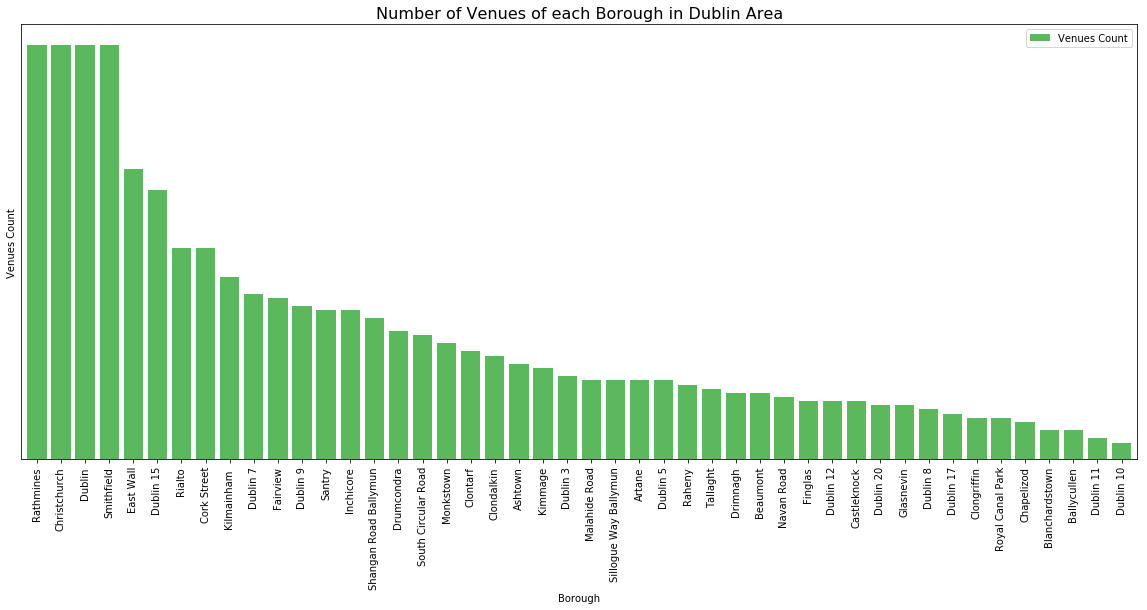

In [41]:
import matplotlib.pyplot as pls
dublin_venues_count.sort_values(['Venues Count'], ascending=False, axis=0, inplace=True)
dublin_venues_count.plot(x='Borough', y='Venues Count', kind='bar', figsize=(20, 8), width = 0.8, color=('#5cb85c')) 
pls.tick_params(top=False,  bottom=True, left=False, right=False, labelleft=False, labelbottom=True)
pls.xlabel('Borough')
pls.ylabel('Venues Count')
pls.title('Number of Venues of each Borough in Dublin Area',fontsize=16)

pls.show()

**Analyzing each Borough of the Dataframe extracted from Foursquare**

In [42]:
# one hot encoding
dublin_onehot = pd.get_dummies(dublin_filter_venues[['Venue Category']], prefix="", prefix_sep="")

# Adding Borough column
dublin_onehot['Borough'] = dublin_filter_venues['Borough'] 

# move Borough column to the first column
fixed_columns = [dublin_onehot.columns[-1]] + list(dublin_onehot.columns[:-1])
dublin_onehot = dublin_onehot[fixed_columns]

dublin_onehot.head()

,Borough,Advertising Agency,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Dublin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dublin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dublin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dublin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dublin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
dublin_onehot.shape

(1409, 186)

In [44]:
dublin_grouped = dublin_onehot.groupby('Borough').mean().reset_index()

dublin_grouped.head(5)

,Borough,Advertising Agency,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Artane,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ashtown,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.043478,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ballycullen,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Beaumont,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.062500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Blanchardstown,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Shape after applying groupby on Borough**

In [45]:
dublin_grouped.shape

(46, 186)

**Dropping few NaN values in the grouped Dataframe**

In [46]:
dublin_grouped.dropna(inplace=True)
dublin_grouped.reset_index(drop=True, inplace=True)
dublin_grouped.head()

,Borough,Advertising Agency,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Artane,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ashtown,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.043478,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ballycullen,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Beaumont,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.062500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Blanchardstown,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Fetch top 5 Venues for each Borough**

In [47]:
num_top_venues = 5

for hood in dublin_grouped['Borough']:
    print("----"+hood+"----")
    temp = dublin_grouped[dublin_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Artane----
            venue  freq
0   Grocery Store  0.16
1        Bus Stop  0.11
2     Supermarket  0.11
3  Clothing Store  0.05
4   Train Station  0.05


----Ashtown----
           venue  freq
0  Train Station  0.17
1           Park  0.09
2    Sports Club  0.09
3            Bar  0.04
4           Café  0.04


----Ballycullen----
               venue  freq
0  Indian Restaurant  0.14
1        Supermarket  0.14
2           Mountain  0.14
3           Pharmacy  0.14
4  Electronics Store  0.14


----Beaumont----
                  venue  freq
0           Supermarket  0.19
1  Fast Food Restaurant  0.12
2  Other Great Outdoors  0.06
3                Market  0.06
4              Bus Stop  0.06


----Blanchardstown----
             venue  freq
0      Supermarket  0.29
1  Thai Restaurant  0.14
2            Hotel  0.14
3              Pub  0.14
4       Steakhouse  0.14


----Castleknock----
                venue  freq
0                Park  0.14
1                Café  0.14
2  Chinese Restaurant

**Function to return most common venues**

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Adding 10 most common Venues for each Borough to the Dataframe**

In [49]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = dublin_grouped['Borough']

for ind in np.arange(dublin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dublin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Artane,Grocery Store,Bus Stop,Supermarket,Fast Food Restaurant,Train Station,Coffee Shop,Clothing Store,Pizza Place,Pharmacy,Chinese Restaurant
1,Ashtown,Train Station,Park,Sports Club,Indian Restaurant,Gym,Pharmacy,Convenience Store,Pub,Coffee Shop,Canal Lock
2,Ballycullen,Indian Restaurant,Mountain,Chinese Restaurant,Pharmacy,Electronics Store,Supermarket,Convenience Store,Health Food Store,Fast Food Restaurant,Farmers Market
3,Beaumont,Supermarket,Fast Food Restaurant,Bus Stop,Electronics Store,Mobile Phone Shop,Grocery Store,Other Great Outdoors,Athletics & Sports,Sandwich Place,Coffee Shop
4,Blanchardstown,Supermarket,Bar,Hotel,Thai Restaurant,Pub,Steakhouse,Zoo Exhibit,Fast Food Restaurant,Farmers Market,Farm
5,Castleknock,Café,Park,Chinese Restaurant,Bakery,Supermarket,Pub,Italian Restaurant,Asian Restaurant,Farm,Gastropub
6,Chapelizod,Hotel,Chinese Restaurant,Convenience Store,Park,Gastropub,Café,Golf Course,Grocery Store,Pub,Dessert Shop
7,Christchurch,Pub,Café,Coffee Shop,Restaurant,Bar,Burrito Place,Pizza Place,Historic Site,Cocktail Bar,Theater
8,Clondalkin,Supermarket,Bar,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Convenience Store,Restaurant,Hotel,Business Service,Garden Center
9,Clongriffin,Food & Drink Shop,Grocery Store,Fish & Chips Shop,Italian Restaurant,Park,Auto Garage,Badminton Court,Gym Pool,Chinese Restaurant,Train Station


In [50]:
neighborhoods_venues_sorted.shape

(46, 11)

**Extracting, Grouping and Joining Top 3 venues for each Borough**

In [51]:
temp= dublin_filter_venues.sort_values(['Borough','Venue Category'],ascending=True).groupby('Borough').head(40)
temp1 = temp.groupby('Borough')
join = temp1['Venue Category'].value_counts()
join=join.to_frame('Count').reset_index()
join=join.sort_values(['Count'],ascending=False).groupby('Borough').head(3)
join['Top3Venues']=join['Count'].astype(str).str.cat(join['Venue Category'].astype(str), sep=' ')
top3venuesdf = join.groupby('Borough')['Top3Venues'].apply(lambda x: ', '.join(x))
top3venuesdf=top3venuesdf.to_frame('Top3Venues').reset_index()
top3venuesdf.head(10)

,Borough,Top3Venues
0,Artane,"3 Grocery Store, 2 Bus Stop, 2 Supermarket"
1,Ashtown,"4 Train Station, 2 Sports Club, 2 Park"
2,Ballycullen,"1 Supermarket, 1 Pharmacy, 1 Mountain"
3,Beaumont,"3 Supermarket, 2 Fast Food Restaurant, 1 Sandw..."
4,Blanchardstown,"2 Supermarket, 1 Thai Restaurant, 1 Steakhouse"
5,Castleknock,"2 Café, 2 Chinese Restaurant, 2 Park"
6,Chapelizod,"1 Golf Course, 1 Hotel, 1 Park"
7,Christchurch,"9 Café, 8 Coffee Shop, 3 Cocktail Bar"
8,Clondalkin,"3 Supermarket, 2 Coffee Shop, 2 Bar"
9,Clongriffin,"1 Auto Garage, 1 Badminton Court, 1 Chinese Re..."


**Clustering using k-Means**

**Created a dataframe for Clustering**

In [52]:
df_year_cluster=df_filtered_locations[['Borough','avgAptRent']]
df_year_cluster.reset_index(drop=True, inplace=True)
df_year_cluster.head()

,Borough,avgAptRent
0,Dublin,1395
1,Monkstown,1438
2,Dublin 3,1437
3,Clontarf,1458
4,East Wall,1428


**Elbow method to indentify Optimal k**

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


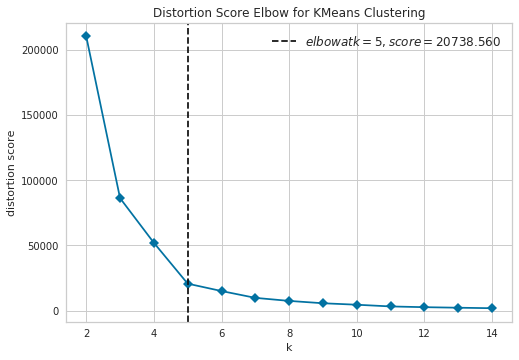

In [53]:
import matplotlib.font_manager
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

data = df_year_cluster.drop('Borough', 1)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings=False)

visualizer.fit(data)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

**From the visual we see that 5 is the optimal value for k**

**Generate Cluster Labels**

In [54]:
from sklearn.cluster import KMeans

# Setting number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([4, 4, 4, 4, 4, 0, 0, 1, 4, 4, 0, 1, 4, 0, 4, 0, 1, 4, 0, 2, 0, 3,
       1, 4, 1, 3, 1, 3, 1, 1, 1, 4, 0, 0, 1, 0, 1, 4, 1, 1, 0, 1, 1, 3,
       1, 1], dtype=int32)

In [55]:
# add clustering labels
df_year_cluster.insert(0, 'Cluster Labels', kmeans.labels_.astype(int))

dublin_merged = df_filtered_locations[['Borough', 'Latitude','Longitude','Distance_from_City_Center_miles']]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dublin_merged = dublin_merged.join(df_year_cluster.set_index('Borough'), on='Borough')

dublin_merged.head() # check the last columns!

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent
0,Dublin,53.349764,-6.260273,1.0,4,1395
8,Monkstown,53.293645,-6.153902,5.9,4,1438
21,Dublin 3,53.361223,-6.185467,3.2,4,1437
22,Clontarf,53.360814,-6.196854,2.7,4,1458
23,East Wall,53.354069,-6.233519,1.1,4,1428


Reset Indexes

In [56]:
dublin_merged.reset_index(drop=True, inplace=True)
dublin_merged.head(10)

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent
0,Dublin,53.349764,-6.260273,1.0,4,1395
1,Monkstown,53.293645,-6.153902,5.9,4,1438
2,Dublin 3,53.361223,-6.185467,3.2,4,1437
3,Clontarf,53.360814,-6.196854,2.7,4,1458
4,East Wall,53.354069,-6.233519,1.1,4,1428
5,Fairview,53.362846,-6.236656,1.3,0,1332
6,Dublin 5,53.383454,-6.181923,4.0,0,1333
7,Artane,53.382500,-6.202500,3.3,1,1256
8,Raheny,53.380198,-6.175146,4.1,4,1415
9,Rathmines,53.326520,-6.264857,1.6,4,1447


**Boroughs Count for each Cluster**

In [57]:
dublin_merged.groupby('Cluster Labels').count()

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,avgAptRent
Cluster Labels,,,,,
0,11,11,11,11,11
1,17,17,17,17,17
2,1,1,1,1,1
3,4,4,4,4,4
4,13,13,13,13,13


In [58]:
dublin_borough_cluster_count = dublin_merged.groupby(['Cluster Labels']).size().reset_index(name='Borough Count')
dublin_borough_cluster_count.head()

,Cluster Labels,Borough Count
0,0,11
1,1,17
2,2,1
3,3,4
4,4,13


**Plot out Boroughs count and Clusters Label as a Barplot**

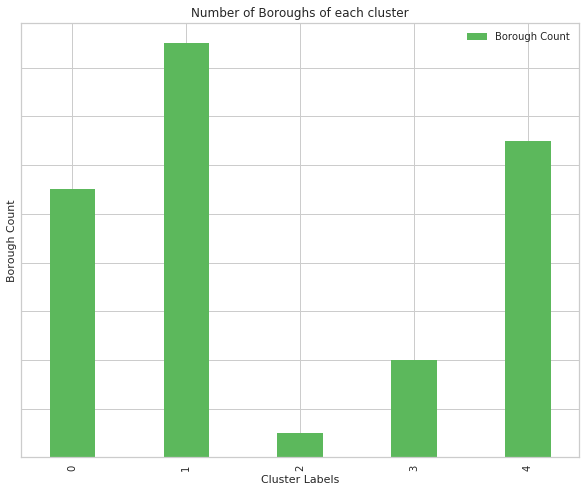

In [59]:
import matplotlib.pyplot as pls
dublin_borough_cluster_count.sort_values(['Cluster Labels'], ascending=True, axis=0, inplace=True)
dublin_borough_cluster_count.plot(x='Cluster Labels', y='Borough Count', kind='bar', figsize=(10, 8), width = 0.4, color=('#5cb85c')) 
pls.tick_params(top=False,  bottom=True, left=False, right=False, labelleft=False, labelbottom=True)
pls.xlabel('Cluster Labels')
pls.ylabel('Borough Count')
pls.title('Number of Boroughs of each cluster',fontsize=12)

pls.show()

**Label each Cluster for better understanding**

    
* **Cluster 0 : "Low-Range"**
* **Cluster 1 : "Mid-Range Level-1"**
* **Cluster 2 : "Mid-Range Level-2"**
* **Cluster 3 : "High-Range Level-1"**
* **Cluster 4 : "High-Range Level-2"**

In [60]:
for i in range(len(dublin_merged)):
        if dublin_merged.loc[i, "Cluster Labels"] == 2:
            value = "Low-Range"
        elif dublin_merged.loc[i, "Cluster Labels"] == 3:
            value = "Mid-Range Level-1"
        elif dublin_merged.loc[i, "Cluster Labels"] == 1:
            value = "Mid-Range Level-2"
        elif dublin_merged.loc[i, "Cluster Labels"] == 0:
            value = "High-Range Level-1"
        else:
            value = "High-Range Level-2"
        
        dublin_merged.loc[i, "Label Name"]=value

In [61]:
dublin_merged.reset_index(drop=True, inplace=True)
dublin_merged.head(10)

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name
0,Dublin,53.349764,-6.260273,1.0,4,1395,High-Range Level-2
1,Monkstown,53.293645,-6.153902,5.9,4,1438,High-Range Level-2
2,Dublin 3,53.361223,-6.185467,3.2,4,1437,High-Range Level-2
3,Clontarf,53.360814,-6.196854,2.7,4,1458,High-Range Level-2
4,East Wall,53.354069,-6.233519,1.1,4,1428,High-Range Level-2
5,Fairview,53.362846,-6.236656,1.3,0,1332,High-Range Level-1
6,Dublin 5,53.383454,-6.181923,4.0,0,1333,High-Range Level-1
7,Artane,53.382500,-6.202500,3.3,1,1256,Mid-Range Level-2
8,Raheny,53.380198,-6.175146,4.1,4,1415,High-Range Level-2
9,Rathmines,53.326520,-6.264857,1.6,4,1447,High-Range Level-2


**Join Top3Venues to the Merge dataframe**

In [62]:
dublin_merged = dublin_merged.join(top3venuesdf.set_index('Borough'), on='Borough')
dublin_merged.head()

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name,Top3Venues
0,Dublin,53.349764,-6.260273,1.0,4,1395,High-Range Level-2,"9 Café, 4 Coffee Shop, 2 Clothing Store"
1,Monkstown,53.293645,-6.153902,5.9,4,1438,High-Range Level-2,"3 Café, 3 Pub, 2 Bar"
2,Dublin 3,53.361223,-6.185467,3.2,4,1437,High-Range Level-2,"2 Beach, 2 Modern European Restaurant, 2 Itali..."
3,Clontarf,53.360814,-6.196854,2.7,4,1458,High-Range Level-2,"3 Hotel, 2 Sports Club, 2 Restaurant"
4,East Wall,53.354069,-6.233519,1.1,4,1428,High-Range Level-2,"7 Coffee Shop, 4 Convenience Store, 4 Café"


**Grouping Distance to City Center**

* Less than 1 Mile            = 1 Mile Radius
* Between 1 and 3 Mile Radius = 3 Mile Radius
* Between 3 and 5 Mile Radius = 5 Mile Radius
* Between 5 and 7 Mile Radius = 7 Mile Radius
* More than 7 Mile Radius     = 10 Mile Radius

In [63]:
group= df_filtered_locations['Distance_from_City_Center_miles'].value_counts()
distmiles_df = pd.DataFrame(group).reset_index()
distmiles_df.columns = ['Distance_from_City_Center_miles','Count']
distmiles_df.head(10)

,Distance_from_City_Center_miles,Count
0,2.6,3
1,5.9,3
2,4.1,2
3,3.5,2
4,1.9,2
5,0.7,2
6,3.1,2
7,5.8,2
8,3.3,2
9,1.6,2


In [64]:
result=[]
def distant(val, cnt):
    if (val <= 1.0):
        Value=distmiles_df[distmiles_df["Distance_from_City_Center_miles"]<=1.0].sum()["Count"].round().astype(int)
        result.append([1, Value])
    elif (val > 1.0) & (val <=3.0):
        Value=distmiles_df[(distmiles_df.Distance_from_City_Center_miles > 1.0) & (distmiles_df.Distance_from_City_Center_miles <=3.0)].sum()["Count"].round().astype(int)
        result.append([3, Value])
    elif (val > 3.0) & (val <= 5.0):
        Value=distmiles_df[(distmiles_df.Distance_from_City_Center_miles >3.0) & (distmiles_df.Distance_from_City_Center_miles <=5.0)].sum()["Count"].round().astype(int)
        result.append([5, Value])
    elif (val > 5.0) & (val <= 7.0):
        Value=distmiles_df[(distmiles_df.Distance_from_City_Center_miles >5.0) & (distmiles_df.Distance_from_City_Center_miles <=7.0)].sum()["Count"].round().astype(int)
        result.append([7, Value])
    else:
        Value=distmiles_df[distmiles_df["Distance_from_City_Center_miles"]>7.0].sum()["Count"].round().astype(int)
        result.append([10, Value])
    return Value

for dist, c in zip(distmiles_df['Distance_from_City_Center_miles'],distmiles_df['Count']):
    value=distant(dist,c)

In [65]:
dist_miles_df = pd.DataFrame(result)
dist_miles_df.columns = ['Miles','Count']
dist_miles_df.drop_duplicates(subset=None,keep='first',inplace=True)
dist_miles_df.head()

,Miles,Count
0,3,19
1,7,7
2,5,17
5,1,3


## Results <a name="results"></a>

**We will merge all new columns into the master table**

In [66]:
dublin_merged = dublin_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')
dublin_merged.head()

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name,Top3Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dublin,53.349764,-6.260273,1.0,4,1395,High-Range Level-2,"9 Café, 4 Coffee Shop, 2 Clothing Store",Pub,Café,Restaurant,Coffee Shop,Italian Restaurant,Hotel,Theater,Sushi Restaurant,Korean Restaurant,Plaza
1,Monkstown,53.293645,-6.153902,5.9,4,1438,High-Range Level-2,"3 Café, 3 Pub, 2 Bar",Pub,Café,Bar,Coffee Shop,Train Station,Movie Theater,Steakhouse,Supermarket,Food & Drink Shop,Breakfast Spot
2,Dublin 3,53.361223,-6.185467,3.2,4,1437,High-Range Level-2,"2 Beach, 2 Modern European Restaurant, 2 Itali...",Grocery Store,Fish & Chips Shop,Beach,Modern European Restaurant,Italian Restaurant,Indian Restaurant,Park,Supermarket,Thai Restaurant,Scenic Lookout
3,Clontarf,53.360814,-6.196854,2.7,4,1458,High-Range Level-2,"3 Hotel, 2 Sports Club, 2 Restaurant",Hotel,Sports Club,Italian Restaurant,Fish & Chips Shop,Restaurant,Indian Restaurant,Pub,Supermarket,Café,Scenic Lookout
4,East Wall,53.354069,-6.233519,1.1,4,1428,High-Range Level-2,"7 Coffee Shop, 4 Convenience Store, 4 Café",Coffee Shop,Convenience Store,Café,Bar,Grocery Store,Pizza Place,Tram Station,Pub,Sushi Restaurant,Burger Joint


**We will updated one of the Top3Venues data by removing single quote for Borough(Chapelizod)**

In [67]:
dublin_merged['Top3Venues']=dublin_merged['Top3Venues'].replace('1 Chinese Restaurant, 1 Convenience Store, 1 Doctor\'s Office','1 Chinese Restaurant, 1 Convenience Store, 1 Doctors Office')

Let's create a map by **Marker** Dublin City Center and **CircleMarker** all Boroughs with the information below

* Borough Name 
* Distance from City Center 
* average Apartment Rent
* Cluster Labels
* Top3 Venues
* Label Name

In [68]:
good_latitudes = dublin_merged['Latitude'].values
good_longitudes = dublin_merged['Longitude'].values
good_locations = [[lat, lon] for lat, lon in zip(good_latitudes, good_longitudes)]

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


map_dublin = folium.Map(location=dublin_center, zoom_start=11)

folium.Marker(dublin_center, popup=address).add_to(map_dublin)


for lat, lon, borough, cluster in zip(dublin_merged['Latitude'], dublin_merged['Longitude'], dublin_merged['Borough'], dublin_merged['Cluster Labels']):
    value_list = [str(borough)]
    df_html = dublin_merged[['Borough','Distance_from_City_Center_miles','avgAptRent','Cluster Labels','Top3Venues','Label Name']]
    html = df_html[df_html.Borough.isin(value_list)].to_html(classes='table table-striped table-bordered table-hover table-condensed', index=False)
    label = folium.Popup(html,max_width='100%')
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1],
                        fill=True, fill_color=rainbow[cluster-1], fill_opacity=1).add_to(map_dublin) 
map_dublin

Let's add radius as **Circle** to the map for each radius and color each radius

In [69]:
good_latitudes = dublin_merged['Latitude'].values
good_longitudes = dublin_merged['Longitude'].values
good_locations = [[lat, lon] for lat, lon in zip(good_latitudes, good_longitudes)]

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

def color_prod_Circle(dist):
    if dist == 1: 
        color = 'white' 
        return color
    elif dist == 3: 
        color = 'brown' 
        return color
    elif dist ==5: 
        color = 'red' 
        return color
    elif dist == 7: 
        color = 'blue' 
        return color
    else: 
        color = 'green' 
        return color
    

map_dublin = folium.Map(location=dublin_center, zoom_start=11)

folium.Marker(dublin_center, popup=address).add_to(map_dublin)

for dist, cnt in zip(dist_miles_df['Miles'],dist_miles_df['Count']):
   
    if dist == 1:
        circlelabel=folium.Popup('In '+str(dist)+' Mile radius we have '+ str(cnt) +' Apartments',parse_html=True)
    else:
        circlelabel=folium.Popup('In '+str(dist)+' Miles radius we have '+ str(cnt) +' Apartments',parse_html=True)
    folium.Circle(dublin_center, radius=dist*1609.344, color=color_prod_Circle(dist), fill=False, fill_opacity=0.6, popup=circlelabel).add_to(map_dublin)

for lat, lon, borough, cluster in zip(dublin_merged['Latitude'], dublin_merged['Longitude'], dublin_merged['Borough'], dublin_merged['Cluster Labels']):
    value_list = [str(borough)]
    df_html = dublin_merged[['Borough','Distance_from_City_Center_miles','avgAptRent','Cluster Labels','Top3Venues','Label Name']]
    html = df_html[df_html.Borough.isin(value_list)].to_html(classes='table table-striped table-bordered table-hover table-condensed', index=False)
    label = folium.Popup(html,max_width='100%')
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1],
                        fill=True, fill_color=rainbow[cluster-1], fill_opacity=1).add_to(map_dublin) 
map_dublin

Finally we will add **Colormap** for avgerage Apartment Rent

In [70]:
variable = 'avgAptRent'
dublin_merged=dublin_merged.sort_values(by=variable, ascending=True)
colormap = folium.LinearColormap(colors=["red","orange","yellow","green"],vmin=dublin_merged.loc[dublin_merged[variable]>0, variable].min(), 
                                 vmax=dublin_merged.loc[dublin_merged[variable]>0, variable].max()).to_step(n=4)
colormap.caption = "Dublin Average Apartment Rent"

In [71]:
good_latitudes = dublin_merged['Latitude'].values
good_longitudes = dublin_merged['Longitude'].values
good_locations = [[lat, lon] for lat, lon in zip(good_latitudes, good_longitudes)]

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

def color_prod_Circle(dist):
    if dist == 1: 
        color = 'white' 
        return color
    elif dist == 3: 
        color = 'brown' 
        return color
    elif dist ==5: 
        color = 'red' 
        return color
    elif dist == 7: 
        color = 'blue' 
        return color
    else: 
        color = 'green' 
        return color
    

map_dublin = folium.Map(width=1000,height=600,location=dublin_center, zoom_start=11)

folium.Marker(dublin_center, popup=address).add_to(map_dublin)

colormap.add_to(map_dublin)

for dist, cnt in zip(dist_miles_df['Miles'],dist_miles_df['Count']):
   
    if dist == 1:
        circlelabel=folium.Popup('In '+str(dist)+' Mile radius we have '+ str(cnt) +' Apartments',parse_html=True)
    else:
        circlelabel=folium.Popup('In '+str(dist)+' Miles radius we have '+ str(cnt) +' Apartments',parse_html=True)
    folium.Circle(dublin_center, radius=dist*1609.344, color=color_prod_Circle(dist), fill=False, fill_opacity=0.6, popup=circlelabel).add_to(map_dublin)

for lat, lon, borough, cluster in zip(dublin_merged['Latitude'], dublin_merged['Longitude'], dublin_merged['Borough'], dublin_merged['Cluster Labels']):
    value_list = [str(borough)]
    df_html = dublin_merged[['Borough','Distance_from_City_Center_miles','avgAptRent','Cluster Labels','Top3Venues','Label Name']]
    html = df_html[df_html.Borough.isin(value_list)].to_html(classes='table table-striped table-bordered table-hover table-condensed', index=False)
    label = folium.Popup(html,max_width='100%')
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1],
                        fill=True, fill_color=rainbow[cluster-1], fill_opacity=1).add_to(map_dublin) 
map_dublin

**Let's view the dataframe after sorting Average Apartment Rent**

In [72]:
dublin_merged.sort_values(['avgAptRent'], ascending=True, axis=0, inplace=True)
dublin_merged.reset_index(drop=True, inplace=True)
dublin_merged.head()

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name,Top3Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,South Circular Road,53.333362,-6.291173,1.7,2,929,Low-Range,"3 Restaurant, 3 Brewery, 2 Pub",Restaurant,Brewery,Supermarket,Bar,Tram Station,Pub,Gym,Café,Cafeteria,Bike Rental / Bike Share
1,Sillogue Way Ballymun,53.393092,-6.269997,3.0,3,1093,Mid-Range Level-1,"2 Supermarket, 2 Pub, 2 Pizza Place",Hotel,Pizza Place,Pub,Supermarket,Theater,Gym Pool,Gym,Grocery Store,Fast Food Restaurant,Nature Preserve
2,Dublin 10,53.343217,-6.360964,4.2,3,1120,Mid-Range Level-1,"1 Supermarket, 1 Chinese Restaurant, 1 Grocery...",Grocery Store,Hotel,Supermarket,Chinese Restaurant,Zoo Exhibit,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
3,Shangan Road Ballymun,53.394419,-6.258052,3.1,3,1142,Mid-Range Level-1,"5 Supermarket, 3 Coffee Shop, 2 Clothing Store",Supermarket,Coffee Shop,Theater,Hotel,Clothing Store,Pizza Place,College Cafeteria,Restaurant,Park,Diner
4,Clondalkin,53.321962,-6.394269,5.9,3,1152,Mid-Range Level-1,"3 Supermarket, 2 Coffee Shop, 2 Bar",Supermarket,Bar,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Convenience Store,Restaurant,Hotel,Business Service,Garden Center


**Let's view each Cluster**

**Cluster 0**

In [73]:
cluster0_df = dublin_merged.loc[dublin_merged['Cluster Labels']==0].sort_values(['avgAptRent'])

#Resetting the index
cluster0_df.reset_index(drop=True, inplace=True)

#Checking the head of the resulting dataframe
cluster0_df.head()

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name,Top3Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dublin 9,53.386050,-6.245577,2.6,0,1314,High-Range Level-1,"4 Fast Food Restaurant, 3 Supermarket, 3 Pub",Fast Food Restaurant,Pub,Supermarket,Grocery Store,Coffee Shop,Chinese Restaurant,Betting Shop,Sandwich Place,Juice Bar,Café
1,Clongriffin,53.402640,-6.151014,5.8,0,1330,High-Range Level-1,"1 Auto Garage, 1 Badminton Court, 1 Chinese Re...",Food & Drink Shop,Grocery Store,Fish & Chips Shop,Italian Restaurant,Park,Auto Garage,Badminton Court,Gym Pool,Chinese Restaurant,Train Station
2,Ashtown,53.375260,-6.341134,3.8,0,1331,High-Range Level-1,"4 Train Station, 2 Sports Club, 2 Park",Train Station,Park,Sports Club,Indian Restaurant,Gym,Pharmacy,Convenience Store,Pub,Coffee Shop,Canal Lock
3,Fairview,53.362846,-6.236656,1.3,0,1332,High-Range Level-1,"5 Café, 3 Pub, 3 Grocery Store",Café,Grocery Store,Pub,Convenience Store,Supermarket,Fast Food Restaurant,Park,Coffee Shop,Deli / Bodega,Scenic Lookout
4,Dublin 5,53.383454,-6.181923,4.0,0,1333,High-Range Level-1,"2 Convenience Store, 2 Train Station, 2 Music ...",Convenience Store,Music Venue,Gym,Train Station,Pub,Veterinarian,Sports Club,Burger Joint,Café,Paper / Office Supplies Store


In [74]:
cluster0_df[['Borough','Latitude','Longitude','Distance_from_City_Center_miles','Cluster Labels','avgAptRent','Label Name','Top3Venues']]

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name,Top3Venues
0,Dublin 9,53.386050,-6.245577,2.6,0,1314,High-Range Level-1,"4 Fast Food Restaurant, 3 Supermarket, 3 Pub"
1,Clongriffin,53.402640,-6.151014,5.8,0,1330,High-Range Level-1,"1 Auto Garage, 1 Badminton Court, 1 Chinese Re..."
2,Ashtown,53.375260,-6.341134,3.8,0,1331,High-Range Level-1,"4 Train Station, 2 Sports Club, 2 Park"
3,Fairview,53.362846,-6.236656,1.3,0,1332,High-Range Level-1,"5 Café, 3 Pub, 3 Grocery Store"
4,Dublin 5,53.383454,-6.181923,4.0,0,1333,High-Range Level-1,"2 Convenience Store, 2 Train Station, 2 Music ..."
5,Malahide Road,53.391554,-6.194688,4.0,0,1335,High-Range Level-1,"3 Grocery Store, 2 Fast Food Restaurant, 2 Sup..."
6,Rialto,53.335774,-6.296931,1.8,0,1346,High-Range Level-1,"4 Bar, 4 Restaurant, 3 Café"
7,Dublin 7,53.360551,-6.284466,1.2,0,1346,High-Range Level-1,"4 Supermarket, 3 Bar, 3 Café"
8,Cork Street,53.336614,-6.287788,1.5,0,1362,High-Range Level-1,"5 Café, 5 Pub, 4 Brewery"
9,Dublin 8,53.350556,-6.320577,2.5,0,1371,High-Range Level-1,"2 Park, 1 Harbor / Marina, 1 Other Great Outdoors"


In [75]:
variable = 'avgAptRent'
cluster0_df=cluster0_df.sort_values(by=variable, ascending=True)
colormap = folium.LinearColormap(colors=["red","orange","yellow","green"],vmin=cluster0_df.loc[cluster0_df[variable]>0, variable].min(), 
                                 vmax=cluster0_df.loc[cluster0_df[variable]>0, variable].max()).to_step(n=4)
colormap.caption = "Cluster 0 Average Apartment Rent"

good_latitudes = dublin_merged['Latitude'].values
good_longitudes = dublin_merged['Longitude'].values
good_locations = [[lat, lon] for lat, lon in zip(good_latitudes, good_longitudes)]

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

def color_prod_Circle(dist):
    if dist == 1: 
        color = 'white' 
        return color
    elif dist == 3: 
        color = 'brown' 
        return color
    elif dist ==5: 
        color = 'red' 
        return color
    elif dist == 7: 
        color = 'blue' 
        return color
    else: 
        color = 'green' 
        return color
    

map_dublin = folium.Map(location=dublin_center, zoom_start=11)

folium.Marker(dublin_center, popup=address).add_to(map_dublin)

colormap.add_to(map_dublin)

for dist, cnt in zip(dist_miles_df['Miles'],dist_miles_df['Count']):
   
    if dist == 1:
        circlelabel=folium.Popup('In '+str(dist)+' Mile radius we have '+ str(cnt) +' Apartments',parse_html=True)
    else:
        circlelabel=folium.Popup('In '+str(dist)+' Miles radius we have '+ str(cnt) +' Apartments',parse_html=True)
    folium.Circle(dublin_center, radius=dist*1609.344, color=color_prod_Circle(dist), fill=False, fill_opacity=0.6, popup=circlelabel).add_to(map_dublin)

for lat, lon, borough, cluster in zip(cluster0_df['Latitude'], cluster0_df['Longitude'], cluster0_df['Borough'], cluster0_df['Cluster Labels']):
    value_list = [str(borough)]
    df_html = cluster0_df[['Borough','Distance_from_City_Center_miles','avgAptRent','Cluster Labels','Top3Venues','Label Name']]
    html = df_html[df_html.Borough.isin(value_list)].to_html(classes='table table-striped table-bordered table-hover table-condensed', index=False)
    label = folium.Popup(html,max_width='100%')
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1],
                        fill=True, fill_color=rainbow[cluster-1], fill_opacity=1).add_to(map_dublin) 
map_dublin

**Cluster 1**

In [76]:
cluster1_df = dublin_merged[dublin_merged['Cluster Labels']==1].sort_values(['avgAptRent'])

#Resetting the index
cluster1_df.reset_index(drop=True, inplace=True)

#Checking the head of the resulting dataframe
cluster1_df.head()

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name,Top3Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dublin 17,53.400361,-6.209491,4.1,1,1221,Mid-Range Level-2,"2 Supermarket, 1 Sandwich Place, 1 Park",Supermarket,Fast Food Restaurant,Coffee Shop,Sandwich Place,Electronics Store,Mobile Phone Shop,Chocolate Shop,Grocery Store,Park,Discount Store
1,Dublin 11,53.386614,-6.292627,2.9,1,1227,Mid-Range Level-2,"1 Pet Store, 1 Supermarket, 1 Park",Fast Food Restaurant,Coffee Shop,Supermarket,Park,Pet Store,Zoo Exhibit,Donut Shop,Fish & Chips Shop,Farmers Market,Farm
2,Beaumont,53.391251,-6.224267,3.2,1,1237,Mid-Range Level-2,"3 Supermarket, 2 Fast Food Restaurant, 1 Sandw...",Supermarket,Fast Food Restaurant,Bus Stop,Electronics Store,Mobile Phone Shop,Grocery Store,Other Great Outdoors,Athletics & Sports,Sandwich Place,Coffee Shop
3,Blanchardstown,53.383081,-6.372418,5.2,1,1240,Mid-Range Level-2,"2 Supermarket, 1 Thai Restaurant, 1 Steakhouse",Supermarket,Bar,Hotel,Thai Restaurant,Pub,Steakhouse,Zoo Exhibit,Fast Food Restaurant,Farmers Market,Farm
4,Chapelizod,53.347915,-6.345197,3.5,1,1245,Mid-Range Level-2,"1 Golf Course, 1 Hotel, 1 Park",Hotel,Chinese Restaurant,Convenience Store,Park,Gastropub,Café,Golf Course,Grocery Store,Pub,Dessert Shop


In [77]:
cluster1_df[['Borough','Latitude','Longitude','Distance_from_City_Center_miles','Cluster Labels','avgAptRent','Label Name','Top3Venues']]

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name,Top3Venues
0,Dublin 17,53.400361,-6.209491,4.1,1,1221,Mid-Range Level-2,"2 Supermarket, 1 Sandwich Place, 1 Park"
1,Dublin 11,53.386614,-6.292627,2.9,1,1227,Mid-Range Level-2,"1 Pet Store, 1 Supermarket, 1 Park"
2,Beaumont,53.391251,-6.224267,3.2,1,1237,Mid-Range Level-2,"3 Supermarket, 2 Fast Food Restaurant, 1 Sandw..."
3,Blanchardstown,53.383081,-6.372418,5.2,1,1240,Mid-Range Level-2,"2 Supermarket, 1 Thai Restaurant, 1 Steakhouse"
4,Chapelizod,53.347915,-6.345197,3.5,1,1245,Mid-Range Level-2,"1 Golf Course, 1 Hotel, 1 Park"
5,Finglas,53.389167,-6.296944,3.1,1,1246,Mid-Range Level-2,"2 Supermarket, 2 Fast Food Restaurant, 1 Groce..."
6,Artane,53.382500,-6.202500,3.3,1,1256,Mid-Range Level-2,"3 Grocery Store, 2 Bus Stop, 2 Supermarket"
7,Ballycullen,53.273516,-6.325358,5.9,1,1256,Mid-Range Level-2,"1 Supermarket, 1 Pharmacy, 1 Mountain"
8,Tallaght,53.289066,-6.356678,5.8,1,1261,Mid-Range Level-2,"2 Park, 2 Hotel, 2 Fast Food Restaurant"
9,Glasnevin,53.376185,-6.268195,1.9,1,1263,Mid-Range Level-2,"3 Restaurant, 2 Park, 2 Café"


In [78]:
variable = 'avgAptRent'
cluster1_df=cluster1_df.sort_values(by=variable, ascending=True)
colormap = folium.LinearColormap(colors=["red","orange","yellow","green"],vmin=cluster1_df.loc[cluster1_df[variable]>0, variable].min(), 
                                 vmax=cluster1_df.loc[cluster1_df[variable]>0, variable].max()).to_step(n=4)
colormap.caption = "Cluster 1 Average Apartment Rent"

good_latitudes = dublin_merged['Latitude'].values
good_longitudes = dublin_merged['Longitude'].values
good_locations = [[lat, lon] for lat, lon in zip(good_latitudes, good_longitudes)]

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

def color_prod_Circle(dist):
    if dist == 1: 
        color = 'white' 
        return color
    elif dist == 3: 
        color = 'brown' 
        return color
    elif dist ==5: 
        color = 'red' 
        return color
    elif dist == 7: 
        color = 'blue' 
        return color
    else: 
        color = 'green' 
        return color
    

map_dublin = folium.Map(location=dublin_center, zoom_start=11)

folium.Marker(dublin_center, popup=address).add_to(map_dublin)

colormap.add_to(map_dublin)

for dist, cnt in zip(dist_miles_df['Miles'],dist_miles_df['Count']):
   
    if dist == 1:
        circlelabel=folium.Popup('In '+str(dist)+' Mile radius we have '+ str(cnt) +' Apartments',parse_html=True)
    else:
        circlelabel=folium.Popup('In '+str(dist)+' Miles radius we have '+ str(cnt) +' Apartments',parse_html=True)
    folium.Circle(dublin_center, radius=dist*1609.344, color=color_prod_Circle(dist), fill=False, fill_opacity=0.6, popup=circlelabel).add_to(map_dublin)

for lat, lon, borough, cluster in zip(cluster1_df['Latitude'], cluster1_df['Longitude'], cluster1_df['Borough'], cluster1_df['Cluster Labels']):
    value_list = [str(borough)]
    df_html = cluster1_df[['Borough','Distance_from_City_Center_miles','avgAptRent','Cluster Labels','Top3Venues','Label Name']]
    html = df_html[df_html.Borough.isin(value_list)].to_html(classes='table table-striped table-bordered table-hover table-condensed', index=False)
    label = folium.Popup(html,max_width='100%')
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1],
                        fill=True, fill_color=rainbow[cluster-1], fill_opacity=1).add_to(map_dublin) 
map_dublin

**Cluster 2**

In [79]:
cluster2_df = dublin_merged[dublin_merged['Cluster Labels']==2].sort_values(['avgAptRent'])

#Resetting the index
cluster2_df.reset_index(drop=True, inplace=True)

#Checking the head of the resulting dataframe
cluster2_df.head()

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name,Top3Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,South Circular Road,53.333362,-6.291173,1.7,2,929,Low-Range,"3 Restaurant, 3 Brewery, 2 Pub",Restaurant,Brewery,Supermarket,Bar,Tram Station,Pub,Gym,Café,Cafeteria,Bike Rental / Bike Share


In [80]:
cluster2_df[['Borough','Latitude','Longitude','Distance_from_City_Center_miles','Cluster Labels','avgAptRent','Label Name','Top3Venues']]

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name,Top3Venues
0,South Circular Road,53.333362,-6.291173,1.7,2,929,Low-Range,"3 Restaurant, 3 Brewery, 2 Pub"


In [81]:
variable = 'avgAptRent'
cluster2_df=cluster2_df.sort_values(by=variable, ascending=True)
colormap = folium.LinearColormap(colors=["red","orange","yellow","green"],vmin=cluster2_df.loc[cluster2_df[variable]>0, variable].min(), 
                                 vmax=cluster2_df.loc[cluster2_df[variable]>0, variable].max()).to_step(n=2)
colormap.caption = "Cluster 2 Average Apartment Rent"

good_latitudes = dublin_merged['Latitude'].values
good_longitudes = dublin_merged['Longitude'].values
good_locations = [[lat, lon] for lat, lon in zip(good_latitudes, good_longitudes)]

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

def color_prod_Circle(dist):
    if dist == 1: 
        color = 'white' 
        return color
    elif dist == 3: 
        color = 'brown' 
        return color
    elif dist ==5: 
        color = 'red' 
        return color
    elif dist == 7: 
        color = 'blue' 
        return color
    else: 
        color = 'green' 
        return color
    

map_dublin = folium.Map(location=dublin_center, zoom_start=11)

folium.Marker(dublin_center, popup=address).add_to(map_dublin)

colormap.add_to(map_dublin)

for dist, cnt in zip(dist_miles_df['Miles'],dist_miles_df['Count']):
   
    if dist == 1:
        circlelabel=folium.Popup('In '+str(dist)+' Mile radius we have '+ str(cnt) +' Apartments',parse_html=True)
    else:
        circlelabel=folium.Popup('In '+str(dist)+' Miles radius we have '+ str(cnt) +' Apartments',parse_html=True)
    folium.Circle(dublin_center, radius=dist*1609.344, color=color_prod_Circle(dist), fill=False, fill_opacity=0.6, popup=circlelabel).add_to(map_dublin)

for lat, lon, borough, cluster in zip(cluster2_df['Latitude'], cluster2_df['Longitude'], cluster2_df['Borough'], cluster2_df['Cluster Labels']):
    value_list = [str(borough)]
    df_html = cluster2_df[['Borough','Distance_from_City_Center_miles','avgAptRent','Cluster Labels','Top3Venues','Label Name']]
    html = df_html[df_html.Borough.isin(value_list)].to_html(classes='table table-striped table-bordered table-hover table-condensed', index=False)
    label = folium.Popup(html,max_width='100%')
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1],
                        fill=True, fill_color=rainbow[cluster-1], fill_opacity=1).add_to(map_dublin) 
map_dublin

**Cluster 3**

In [82]:
cluster3_df = dublin_merged[dublin_merged['Cluster Labels']==3].sort_values(['avgAptRent'])

#Resetting the index
cluster3_df.reset_index(drop=True, inplace=True)

#Checking the head of the resulting dataframe
cluster3_df.head()

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name,Top3Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sillogue Way Ballymun,53.393092,-6.269997,3.0,3,1093,Mid-Range Level-1,"2 Supermarket, 2 Pub, 2 Pizza Place",Hotel,Pizza Place,Pub,Supermarket,Theater,Gym Pool,Gym,Grocery Store,Fast Food Restaurant,Nature Preserve
1,Dublin 10,53.343217,-6.360964,4.2,3,1120,Mid-Range Level-1,"1 Supermarket, 1 Chinese Restaurant, 1 Grocery...",Grocery Store,Hotel,Supermarket,Chinese Restaurant,Zoo Exhibit,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
2,Shangan Road Ballymun,53.394419,-6.258052,3.1,3,1142,Mid-Range Level-1,"5 Supermarket, 3 Coffee Shop, 2 Clothing Store",Supermarket,Coffee Shop,Theater,Hotel,Clothing Store,Pizza Place,College Cafeteria,Restaurant,Park,Diner
3,Clondalkin,53.321962,-6.394269,5.9,3,1152,Mid-Range Level-1,"3 Supermarket, 2 Coffee Shop, 2 Bar",Supermarket,Bar,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Convenience Store,Restaurant,Hotel,Business Service,Garden Center


In [83]:
cluster3_df[['Borough','Latitude','Longitude','Distance_from_City_Center_miles','Cluster Labels','avgAptRent','Label Name','Top3Venues']]

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name,Top3Venues
0,Sillogue Way Ballymun,53.393092,-6.269997,3.0,3,1093,Mid-Range Level-1,"2 Supermarket, 2 Pub, 2 Pizza Place"
1,Dublin 10,53.343217,-6.360964,4.2,3,1120,Mid-Range Level-1,"1 Supermarket, 1 Chinese Restaurant, 1 Grocery..."
2,Shangan Road Ballymun,53.394419,-6.258052,3.1,3,1142,Mid-Range Level-1,"5 Supermarket, 3 Coffee Shop, 2 Clothing Store"
3,Clondalkin,53.321962,-6.394269,5.9,3,1152,Mid-Range Level-1,"3 Supermarket, 2 Coffee Shop, 2 Bar"


In [84]:
variable = 'avgAptRent'
cluster3_df=cluster3_df.sort_values(by=variable, ascending=True)
colormap = folium.LinearColormap(colors=["red","orange","yellow","green"],vmin=cluster3_df.loc[cluster3_df[variable]>0, variable].min(), 
                                 vmax=cluster3_df.loc[cluster3_df[variable]>0, variable].max()).to_step(n=4)
colormap.caption = "Cluster 3 Average Apartment Rent"

good_latitudes = dublin_merged['Latitude'].values
good_longitudes = dublin_merged['Longitude'].values
good_locations = [[lat, lon] for lat, lon in zip(good_latitudes, good_longitudes)]

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

def color_prod_Circle(dist):
    if dist == 1: 
        color = 'white' 
        return color
    elif dist == 3: 
        color = 'brown' 
        return color
    elif dist ==5: 
        color = 'red' 
        return color
    elif dist == 7: 
        color = 'blue' 
        return color
    else: 
        color = 'green' 
        return color
    

map_dublin = folium.Map(location=dublin_center, zoom_start=11)

folium.Marker(dublin_center, popup=address).add_to(map_dublin)

colormap.add_to(map_dublin)

for dist, cnt in zip(dist_miles_df['Miles'],dist_miles_df['Count']):
   
    if dist == 1:
        circlelabel=folium.Popup('In '+str(dist)+' Mile radius we have '+ str(cnt) +' Apartments',parse_html=True)
    else:
        circlelabel=folium.Popup('In '+str(dist)+' Miles radius we have '+ str(cnt) +' Apartments',parse_html=True)
    folium.Circle(dublin_center, radius=dist*1609.344, color=color_prod_Circle(dist), fill=False, fill_opacity=0.6, popup=circlelabel).add_to(map_dublin)

for lat, lon, borough, cluster in zip(cluster3_df['Latitude'], cluster3_df['Longitude'], cluster3_df['Borough'], cluster3_df['Cluster Labels']):
    value_list = [str(borough)]
    df_html = cluster3_df[['Borough','Distance_from_City_Center_miles','avgAptRent','Cluster Labels','Top3Venues','Label Name']]
    html = df_html[df_html.Borough.isin(value_list)].to_html(classes='table table-striped table-bordered table-hover table-condensed', index=False)
    label = folium.Popup(html,max_width='100%')
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1],
                        fill=True, fill_color=rainbow[cluster-1], fill_opacity=1).add_to(map_dublin) 
map_dublin

**Cluster 4**

In [85]:
cluster4_df = dublin_merged[dublin_merged['Cluster Labels']==4].sort_values(['avgAptRent'])

#Resetting the index
cluster4_df.reset_index(drop=True, inplace=True)

#Checking the head of the resulting dataframe
cluster4_df.head()

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name,Top3Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dublin,53.349764,-6.260273,1.0,4,1395,High-Range Level-2,"9 Café, 4 Coffee Shop, 2 Clothing Store",Pub,Café,Restaurant,Coffee Shop,Italian Restaurant,Hotel,Theater,Sushi Restaurant,Korean Restaurant,Plaza
1,Kilmainham,53.341046,-6.307278,2.0,4,1409,High-Range Level-2,"4 Platform, 3 Restaurant, 3 Café",Platform,Café,Tram Station,Restaurant,Pharmacy,Park,Garden,Pub,Coffee Shop,Supermarket
2,Drumcondra,53.372525,-6.249515,1.6,4,1412,High-Range Level-2,"5 Pub, 3 Café, 2 Restaurant",Pub,Café,Park,Restaurant,Supermarket,Bus Stop,Fast Food Restaurant,Sports Club,Soccer Stadium,Soccer Field
3,Castleknock,53.369209,-6.362871,4.5,4,1414,High-Range Level-2,"2 Café, 2 Chinese Restaurant, 2 Park",Café,Park,Chinese Restaurant,Bakery,Supermarket,Pub,Italian Restaurant,Asian Restaurant,Farm,Gastropub
4,Drimnagh,53.326579,-6.336933,3.6,4,1414,High-Range Level-2,"3 Convenience Store, 2 Grocery Store, 2 Superm...",Convenience Store,Grocery Store,Supermarket,Rental Car Location,Farm,Sporting Goods Shop,Diner,Music Venue,Light Rail Station,Department Store


In [86]:
cluster4_df[['Borough','Latitude','Longitude','Distance_from_City_Center_miles','Cluster Labels','avgAptRent','Label Name','Top3Venues']]

,Borough,Latitude,Longitude,Distance_from_City_Center_miles,Cluster Labels,avgAptRent,Label Name,Top3Venues
0,Dublin,53.349764,-6.260273,1.0,4,1395,High-Range Level-2,"9 Café, 4 Coffee Shop, 2 Clothing Store"
1,Kilmainham,53.341046,-6.307278,2.0,4,1409,High-Range Level-2,"4 Platform, 3 Restaurant, 3 Café"
2,Drumcondra,53.372525,-6.249515,1.6,4,1412,High-Range Level-2,"5 Pub, 3 Café, 2 Restaurant"
3,Castleknock,53.369209,-6.362871,4.5,4,1414,High-Range Level-2,"2 Café, 2 Chinese Restaurant, 2 Park"
4,Drimnagh,53.326579,-6.336933,3.6,4,1414,High-Range Level-2,"3 Convenience Store, 2 Grocery Store, 2 Superm..."
5,Raheny,53.380198,-6.175146,4.1,4,1415,High-Range Level-2,"2 Gym, 1 Café, 1 Burger Joint"
6,Christchurch,53.342689,-6.272784,0.7,4,1426,High-Range Level-2,"9 Café, 8 Coffee Shop, 3 Cocktail Bar"
7,East Wall,53.354069,-6.233519,1.1,4,1428,High-Range Level-2,"7 Coffee Shop, 4 Convenience Store, 4 Café"
8,Dublin 3,53.361223,-6.185467,3.2,4,1437,High-Range Level-2,"2 Beach, 2 Modern European Restaurant, 2 Itali..."
9,Monkstown,53.293645,-6.153902,5.9,4,1438,High-Range Level-2,"3 Café, 3 Pub, 2 Bar"


In [87]:
variable = 'avgAptRent'
cluster4_df=cluster4_df.sort_values(by=variable, ascending=True)
colormap = folium.LinearColormap(colors=["red","orange","yellow","green"],vmin=cluster4_df.loc[cluster4_df[variable]>0, variable].min(), 
                                 vmax=cluster4_df.loc[cluster4_df[variable]>0, variable].max()).to_step(n=4)
colormap.caption = "Cluster 4 Average Apartment Rent"

good_latitudes = dublin_merged['Latitude'].values
good_longitudes = dublin_merged['Longitude'].values
good_locations = [[lat, lon] for lat, lon in zip(good_latitudes, good_longitudes)]

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

def color_prod_Circle(dist):
    if dist == 1: 
        color = 'white' 
        return color
    elif dist == 3: 
        color = 'brown' 
        return color
    elif dist ==5: 
        color = 'red' 
        return color
    elif dist == 7: 
        color = 'blue' 
        return color
    else: 
        color = 'green' 
        return color
    

map_dublin = folium.Map(location=dublin_center, zoom_start=11)

folium.Marker(dublin_center, popup=address).add_to(map_dublin)

colormap.add_to(map_dublin)

for dist, cnt in zip(dist_miles_df['Miles'],dist_miles_df['Count']):
   
    if dist == 1:
        circlelabel=folium.Popup('In '+str(dist)+' Mile radius we have '+ str(cnt) +' Apartments',parse_html=True)
    else:
        circlelabel=folium.Popup('In '+str(dist)+' Miles radius we have '+ str(cnt) +' Apartments',parse_html=True)
    folium.Circle(dublin_center, radius=dist*1609.344, color=color_prod_Circle(dist), fill=False, fill_opacity=0.6, popup=circlelabel).add_to(map_dublin)

for lat, lon, borough, cluster in zip(cluster4_df['Latitude'], cluster4_df['Longitude'], cluster4_df['Borough'], cluster4_df['Cluster Labels']):
    value_list = [str(borough)]
    df_html = cluster4_df[['Borough','Distance_from_City_Center_miles','avgAptRent','Cluster Labels','Top3Venues','Label Name']]
    html = df_html[df_html.Borough.isin(value_list)].to_html(classes='table table-striped table-bordered table-hover table-condensed', index=False)
    label = folium.Popup(html,max_width='100%')
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1],
                        fill=True, fill_color=rainbow[cluster-1], fill_opacity=1).add_to(map_dublin) 
map_dublin

**Creating a Final Presentation Dataframe from Dublin Merged Dataframe**

In [88]:
df_final_presentation=dublin_merged[['Borough', 'Latitude','Longitude','Cluster Labels','Distance_from_City_Center_miles','avgAptRent','Top3Venues','Label Name']].sort_values(['avgAptRent'])

**Saving the Dublin Merged Data into csv**

In [89]:
dublin_merged.head(40)
dublin_merged.to_csv('Dublin_final_merged.csv')

**Adding Venues count for each Borough to the Final Presentation dataframe**

In [90]:
df_final_presentation = df_final_presentation.join(dublin_venues_count.set_index('Borough'), on='Borough')
df_final_presentation.head()

,Borough,Latitude,Longitude,Cluster Labels,Distance_from_City_Center_miles,avgAptRent,Top3Venues,Label Name,Venues Count
0,South Circular Road,53.333362,-6.291173,2,1.7,929,"3 Restaurant, 3 Brewery, 2 Pub",Low-Range,30
1,Sillogue Way Ballymun,53.393092,-6.269997,3,3.0,1093,"2 Supermarket, 2 Pub, 2 Pizza Place",Mid-Range Level-1,19
2,Dublin 10,53.343217,-6.360964,3,4.2,1120,"1 Supermarket, 1 Chinese Restaurant, 1 Grocery...",Mid-Range Level-1,4
3,Shangan Road Ballymun,53.394419,-6.258052,3,3.1,1142,"5 Supermarket, 3 Coffee Shop, 2 Clothing Store",Mid-Range Level-1,34
4,Clondalkin,53.321962,-6.394269,3,5.9,1152,"3 Supermarket, 2 Coffee Shop, 2 Bar",Mid-Range Level-1,25


**Saving the Dublin Final presentation dataframe into csv**

In [91]:
df_final_presentation.to_csv('Dublin_Final_Presentation.csv')
print('Data uploaded to csv')

Data uploaded to csv


**Display all 46 rows of Final dataframe**

In [92]:
df_final_presentation.head(46)

,Borough,Latitude,Longitude,Cluster Labels,Distance_from_City_Center_miles,avgAptRent,Top3Venues,Label Name,Venues Count
0,South Circular Road,53.333362,-6.291173,2,1.7,929,"3 Restaurant, 3 Brewery, 2 Pub",Low-Range,30
1,Sillogue Way Ballymun,53.393092,-6.269997,3,3.0,1093,"2 Supermarket, 2 Pub, 2 Pizza Place",Mid-Range Level-1,19
2,Dublin 10,53.343217,-6.360964,3,4.2,1120,"1 Supermarket, 1 Chinese Restaurant, 1 Grocery...",Mid-Range Level-1,4
3,Shangan Road Ballymun,53.394419,-6.258052,3,3.1,1142,"5 Supermarket, 3 Coffee Shop, 2 Clothing Store",Mid-Range Level-1,34
4,Clondalkin,53.321962,-6.394269,3,5.9,1152,"3 Supermarket, 2 Coffee Shop, 2 Bar",Mid-Range Level-1,25
5,Dublin 17,53.400361,-6.209491,1,4.1,1221,"2 Supermarket, 1 Sandwich Place, 1 Park",Mid-Range Level-2,11
6,Dublin 11,53.386614,-6.292627,1,2.9,1227,"1 Pet Store, 1 Supermarket, 1 Park",Mid-Range Level-2,5
7,Beaumont,53.391251,-6.224267,1,3.2,1237,"3 Supermarket, 2 Fast Food Restaurant, 1 Sandw...",Mid-Range Level-2,16
8,Blanchardstown,53.383081,-6.372418,1,5.2,1240,"2 Supermarket, 1 Thai Restaurant, 1 Steakhouse",Mid-Range Level-2,7
9,Chapelizod,53.347915,-6.345197,1,3.5,1245,"1 Golf Course, 1 Hotel, 1 Park",Mid-Range Level-2,9


### Below line of code which will help us to identify the correct location out of 3 Optimal locations
Generating dataframe and plotting out graphs of Cluster 3 and Cluster 1 Optimal Locations

**Plotting Yearly data in graph to compare different optiomal locations**

In [93]:
temp=df[['Borough','2015','2016','2017','2018','2019']]
optimal_locations=['Shangan Road Ballymun','Santry','Blanchardstown']
df_optloc_yearlyrent=temp[temp.Borough.isin(optimal_locations)]
df_optloc_yearlyrent.reset_index(drop=True, inplace=True)
df_optloc_yearlyrent.set_index('Borough', inplace=True)
df_optloc_yearlyrent.head()

,2015,2016,2017,2018,2019
Borough,,,,,
Shangan Road Ballymun,987,1070,1155,1290,1416
Santry,1122,1229,1322,1394,1422
Blanchardstown,1106,1191,1269,1358,1389


In [94]:
years = list(map(str, range(2015, 2020)))
years

['2015', '2016', '2017', '2018', '2019']

In [95]:
df_optloc_yearlyrent=df_optloc_yearlyrent[years].transpose()
df_optloc_yearlyrent.head()

Borough,Shangan Road Ballymun,Santry,Blanchardstown
2015,987,1122,1106
2016,1070,1229,1191
2017,1155,1322,1269
2018,1290,1394,1358
2019,1416,1422,1389


**Plot Box and Line graphs**

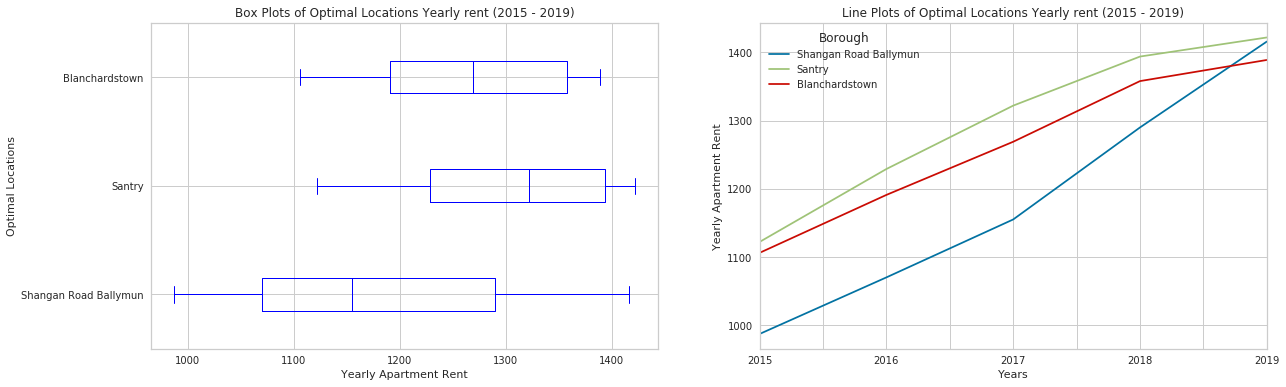

In [97]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_optloc_yearlyrent.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Optimal Locations Yearly rent (2015 - 2019)')
ax0.set_xlabel('Yearly Apartment Rent')
ax0.set_ylabel('Optimal Locations')

# Subplot 2: Line plot
df_optloc_yearlyrent.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Optimal Locations Yearly rent (2015 - 2019)')
ax1.set_ylabel('Yearly Apartment Rent')
ax1.set_xlabel('Years')

plt.show()

In [98]:
df_optloc_yearlyrent.head()

Borough,Shangan Road Ballymun,Santry,Blanchardstown
2015,987,1122,1106
2016,1070,1229,1191
2017,1155,1322,1269
2018,1290,1394,1358
2019,1416,1422,1389


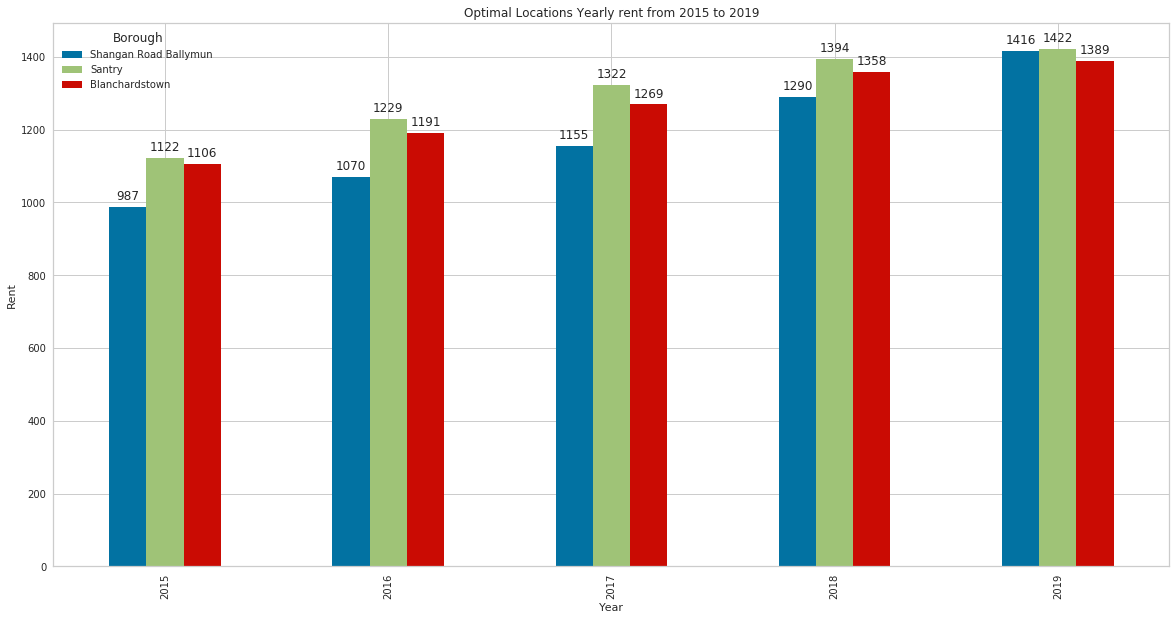

In [99]:
ax = df_optloc_yearlyrent.plot(kind='bar', figsize=(20, 10)) 
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Rent') # add y-label to the plot
plt.title('Optimal Locations Yearly rent from 2015 to 2019') # add title to the plot


def add_value_labels(ax, spacing=4):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        label = format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0,space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("OptimalLocationsYrlydata.png")

**Function to generate Y-Y% of all Optimal locations from 2015-2019**

In [100]:
print('Generating Y-Y% columns: ', end='')
tdf_yr_per = df[df.columns[25:30]]
cols = tdf_yr_per.columns
for j in range(len(cols)):
    if j < len(cols)-1:
        curr_year=cols[j]
        next_year=cols[j+1]
        percolumn=curr_year+'-'+next_year+'%'
        for i in range(len(tdf2bed)):
            first=tdf_yr_per.loc[i, curr_year]
            last=tdf_yr_per.loc[i, next_year]
            try:
                percent=format(CAGR(first, last))
                tdf_yr_per.loc[i, percolumn]=percent
                tdf_yr_per[percolumn]=tdf_yr_per[percolumn].astype(float)
                print(' .', end='')
            except(ZeroDivisionError, NameError):
                print('Divide by zero ' + first + ' - ' + last)
                
print(' done.')
            #print('Current Year :', curr_year + ' Next Year :', next_year + 'Percentage : ', percent)

df[tdf_yr_per.columns[5:]] = tdf_yr_per[tdf_yr_per.columns[5:]]
df.head()

Generating Y-Y% columns: 

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


,Property Type,Number of Bedrooms,Borough,Neighbourhood,Latitude,Longitude,2015Q1,2015Q2,2015Q3,2015Q4,...,avgAptRent,2015,2016,2017,2018,2019,2015-2016%,2016-2017%,2017-2018%,2018-2019%
0,Apartment,Two bed,Dublin,Dublin,53.349764,-6.260273,1203.10,1224.80,1271.08,1274.81,...,1395,1243,1319,1430,1535,1605,6.1,8.4,7.3,4.6
1,Apartment,Two bed,Balbriggan,Dublin,53.609832,-6.186196,806.56,824.96,840.79,861.38,...,967,833,920,997,1080,1126,10.4,8.4,8.3,4.3
2,Apartment,Two bed,Blackrock,Dublin,53.301864,-6.178834,1403.09,1431.49,1462.82,1467.62,...,1587,1441,1521,1635,1703,1779,5.6,7.5,4.2,4.5
3,Apartment,Two bed,Booterstown,Dublin,53.308629,-6.196652,1411.06,1452.15,1459.70,1484.88,...,1607,1451,1543,1608,1761,1871,6.3,4.2,9.5,6.2
4,Apartment,Two bed,Donabate,Dublin,53.481800,-6.154880,925.00,957.98,978.41,992.05,...,1117,963,1065,1180,1224,1253,10.6,10.8,3.7,2.4



**Generate a new column that shows total percentage rise from 2015-2019 add add that to the dataframe**

In [101]:
print('Generating total% rise from 2015-2019 ', end='')
tdf_yr_min_max_per = df[df.columns[25:30]]
cols = tdf_yr_min_max_per.columns
curr_year=min(cols)
next_year=max(cols)
percolumn=curr_year+'-'+next_year+'%'

for i in range(len(tdf2bed)):
    first=tdf_yr_min_max_per.loc[i, curr_year]
    last=tdf_yr_min_max_per.loc[i, next_year]    
    try:
        percent=format(CAGR(first, last))
        tdf_yr_min_max_per.loc[i, percolumn]=percent
        tdf_yr_min_max_per[percolumn]=tdf_yr_min_max_per[percolumn].astype(float)
        print(' .', end='')
    except(ZeroDivisionError, NameError):
        print('Divide by zero ' + first + ' - ' + last)        
print(' done.')
    #print('Current Year :', curr_year + ' Next Year :', next_year + 'Percentage : ', percent)

tdf_yr_min_max_per.head()
df[tdf_yr_min_max_per.columns[5:]] = tdf_yr_min_max_per[tdf_yr_min_max_per.columns[5:]]
df.head()

Generating total% rise from 2015-2019 

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


,Property Type,Number of Bedrooms,Borough,Neighbourhood,Latitude,Longitude,2015Q1,2015Q2,2015Q3,2015Q4,...,2015,2016,2017,2018,2019,2015-2016%,2016-2017%,2017-2018%,2018-2019%,2015-2019%
0,Apartment,Two bed,Dublin,Dublin,53.349764,-6.260273,1203.10,1224.80,1271.08,1274.81,...,1243,1319,1430,1535,1605,6.1,8.4,7.3,4.6,29.1
1,Apartment,Two bed,Balbriggan,Dublin,53.609832,-6.186196,806.56,824.96,840.79,861.38,...,833,920,997,1080,1126,10.4,8.4,8.3,4.3,35.2
2,Apartment,Two bed,Blackrock,Dublin,53.301864,-6.178834,1403.09,1431.49,1462.82,1467.62,...,1441,1521,1635,1703,1779,5.6,7.5,4.2,4.5,23.5
3,Apartment,Two bed,Booterstown,Dublin,53.308629,-6.196652,1411.06,1452.15,1459.70,1484.88,...,1451,1543,1608,1761,1871,6.3,4.2,9.5,6.2,28.9
4,Apartment,Two bed,Donabate,Dublin,53.481800,-6.154880,925.00,957.98,978.41,992.05,...,963,1065,1180,1224,1253,10.6,10.8,3.7,2.4,30.1


**Created a new dataframe of Yearly rent and Y-Y% for selected locations from 2015-2019**

In [102]:
temp=df[['Borough','2015','2016','2017','2018','2019','2015-2016%','2016-2017%','2017-2018%','2018-2019%','2015-2019%']]
optimal_locations=['Santry','Blanchardstown','Artane','Inchicore','Dublin 15']
#optimal_locations=['Shangan Road Ballymun','Santry','Blanchardstown','Sillogue Way Ballymun','Artane']
df_optloc_yearlyrise=temp[temp.Borough.isin(optimal_locations)]
df_optloc_yearlyrise.reset_index(drop=True, inplace=True)
df_optloc_yearlyrise.head()

,Borough,2015,2016,2017,2018,2019,2015-2016%,2016-2017%,2017-2018%,2018-2019%,2015-2019%
0,Artane,1114,1183,1283,1387,1487,6.2,8.5,8.1,7.2,33.5
1,Inchicore,1166,1234,1344,1381,1422,5.8,8.9,2.8,3.0,22.0
2,Santry,1122,1229,1322,1394,1422,9.5,7.6,5.4,2.0,26.7
3,Dublin 15,1140,1226,1317,1415,1461,7.5,7.4,7.4,3.3,28.2
4,Blanchardstown,1106,1191,1269,1358,1389,7.7,6.5,7.0,2.3,25.6


In [103]:
optimal_locations=['Dublin 15','Santry','Blanchardstown', 'Artane','Sillogue Way Ballymun','Shangan Road Ballymun','Clondalkin','Dublin 10']
df_final_presentation[df_final_presentation.Borough.isin(optimal_locations)]

,Borough,Latitude,Longitude,Cluster Labels,Distance_from_City_Center_miles,avgAptRent,Top3Venues,Label Name,Venues Count
1,Sillogue Way Ballymun,53.393092,-6.269997,3,3.0,1093,"2 Supermarket, 2 Pub, 2 Pizza Place",Mid-Range Level-1,19
2,Dublin 10,53.343217,-6.360964,3,4.2,1120,"1 Supermarket, 1 Chinese Restaurant, 1 Grocery...",Mid-Range Level-1,4
3,Shangan Road Ballymun,53.394419,-6.258052,3,3.1,1142,"5 Supermarket, 3 Coffee Shop, 2 Clothing Store",Mid-Range Level-1,34
4,Clondalkin,53.321962,-6.394269,3,5.9,1152,"3 Supermarket, 2 Coffee Shop, 2 Bar",Mid-Range Level-1,25
8,Blanchardstown,53.383081,-6.372418,1,5.2,1240,"2 Supermarket, 1 Thai Restaurant, 1 Steakhouse",Mid-Range Level-2,7
11,Artane,53.382500,-6.202500,1,3.3,1256,"3 Grocery Store, 2 Bus Stop, 2 Supermarket",Mid-Range Level-2,19
17,Santry,53.397158,-6.245472,1,3.3,1276,"4 Supermarket, 2 Soccer Field, 2 Park",Mid-Range Level-2,36
19,Dublin 15,53.394935,-6.389209,1,6.2,1285,"4 Clothing Store, 4 Coffee Shop, 4 Fast Food R...",Mid-Range Level-2,65


## Discussion <a name="discussion"></a>

When we compare the apartment rents in different clusters, we see that the lowest and highest rents were observed in Cluster 2 (929 Euros) and Cluster 4 (1395 to 1486 Euros). The apartment rent in Cluster 3 ranged from 1093 to 1152 Euros whereas in Cluster 1 it was between 1221 and 1293 Euros.

The range of rent in Cluster 0 was 1314 to 1384 Euros.

*  **Cluster 0** has good number of boroughs located close to Dublin City Center, approximately within 3 miles. These boroughs also have higher number of venue counts. However, the apartment rent is a bit high (1314 to 1384 Euros) in this cluster. Hence, we can ignore this cluster.


*  **Cluster 4** being close to Dublin City Center has more number of boroughs with venue count reaching 100 but the apartment rents are the highest here compared to other clusters. 


*  **Cluster 2** with the lowest apartment rent has only one borough **[South Circular Road](https://en.wikipedia.org/wiki/South_Circular_Road,_Dublin)**, though it higher number of venue counts. Much information about this borough was not available in Wikipedia.


*  **Cluster 3** has four boroughs that with mid-range apartment rent. Out of the 4 boroughs we consider two Boroughs as they are in 3 mile radius to City Center.


1. **[Sillogue Way Ballymun](https://en.wikipedia.org/wiki/Ballymun)** : It has an average apartment rent of 1093 Euros and is located 3 miles from Dublin City Center with a venue Count of 18
2. **[Shangan Road Ballymun](https://en.wikipedia.org/wiki/Ballymun)**: It has an average apartment rent of 1142 Euros and is located 3.1 miles from Dublin City Center with a venue Count of 35.


  These two boroughs are located within 100m radius and therefore they might be sharing common venues though Shangan Road Ballymun has more number of venues compared to the Sillogue Way Ballymun. Shangan Road Ballymun, with a population 21,626 persons has Bus Station, Schools and Dublin Central University (DCU) and is also in close proximity to Dublin Airport

Hence, we can recommend Shangan Road Ballymun location as optimal one from Cluster 3.


*  **Cluster 1** has apartments with mid-range rent. It has few good locations such as Dublin 15, Santry, Blanchardstown, Artane, Inchicore which has good number of venues when compare to other locations of Cluster 1. Some of them are close and few are pretty far from Dublin City Center.

In [105]:
temp=df[['Borough','2015','2016','2017','2018','2019','2015-2016%','2016-2017%','2017-2018%','2018-2019%','2015-2019%']]
optimal_locations=['Santry','Blanchardstown','Artane','Inchicore','Dublin 15']
df_optloc_yearlyrise=temp[temp.Borough.isin(optimal_locations)]
df_optloc_yearlyrise.reset_index(drop=True, inplace=True)
df_optloc_yearlyrise.head()

,Borough,2015,2016,2017,2018,2019,2015-2016%,2016-2017%,2017-2018%,2018-2019%,2015-2019%
0,Artane,1114,1183,1283,1387,1487,6.2,8.5,8.1,7.2,33.5
1,Inchicore,1166,1234,1344,1381,1422,5.8,8.9,2.8,3.0,22.0
2,Santry,1122,1229,1322,1394,1422,9.5,7.6,5.4,2.0,26.7
3,Dublin 15,1140,1226,1317,1415,1461,7.5,7.4,7.4,3.3,28.2
4,Blanchardstown,1106,1191,1269,1358,1389,7.7,6.5,7.0,2.3,25.6


**Note:** Blanchardstown is part of Dublin 15 Region. Hence the venue count of Dublin 15 can also be attributed to Blanchardstown. Dublin 15 is a district which consists of Blanchardstown and couple of other Neighborhoods.

**[Santry:](https://en.wikipedia.org/wiki/Santry)**

This borough has Boys and Girls National schools, Secondary schools, Colleges, Stadiums, Industrial Estates, Business Park (IT Companies) and Shopping Centers, Dublin Bus routes to major locations in Dublin, Dublin Metro Close to Airport.

**[Blanchardstown:](https://en.wikipedia.org/wiki/Blanchardstown)**

It is the one of the largest urban areas in Dublin. One of Ireland's largest shopping and leisure centres, the Blanchardstown Centre, is located in the area. It has bus routes to all places in Dublin operated by Dublin Bus, Go-Ahead Ireland.

Connolly Hospital, one of Dublin's main hospitals, and a public university teaching hospital, is located in the area, as is the Institute of Technology, Blanchardstown. Local retail outlets include Blanchardstown Centre (a large retail shopping centre with over 180 stores), and WestEnd Shopping Park (a retail park located beside the Blanchardstown Centre). The Carlton Hotel, a 4 Star Hotel north-west of the village, is located by the Blanchardstown Centre complex.
Blanchardstown has a large public library, and is also home to the Draíocht Arts Centre.

It has Primary Level, Second Level and Third Level Education schools.

The National Sports Campus is located in Blanchardstown, and includes the National Aquatic Centre (NAC), a major indoor aquatics facility with a 50m swimming pool, diving pool, leisure pool and aquapark, and fitness centre. The centre hosted the Special Olympics World Summer Games in 2003, and a number of international swimming events since then.

**[Artane:](https://en.wikipedia.org/wiki/Artane,_Dublin)**

It has a population of 36,564 persons, Shopping Centers, Dublin Bus serving more locations and it has two Train Stations.

In [106]:
temp=df[['Borough','2015','2016','2017','2018','2019','2015-2016%','2016-2017%','2017-2018%','2018-2019%','2015-2019%']]
optimal_locations=['Santry','Blanchardstown','Artane']
df_optloc_yearlyrise=temp[temp.Borough.isin(optimal_locations)]
df_optloc_yearlyrise.reset_index(drop=True, inplace=True)
df_optloc_yearlyrise.head()

,Borough,2015,2016,2017,2018,2019,2015-2016%,2016-2017%,2017-2018%,2018-2019%,2015-2019%
0,Artane,1114,1183,1283,1387,1487,6.2,8.5,8.1,7.2,33.5
1,Santry,1122,1229,1322,1394,1422,9.5,7.6,5.4,2.0,26.7
2,Blanchardstown,1106,1191,1269,1358,1389,7.7,6.5,7.0,2.3,25.6


**[Inchicore:](https://en.wikipedia.org/wiki/Inchicore)**

Meaning "Island of Sheep" is a suburb of Dublin, Ireland.
Inchicore is accessed by multiple roads and served by a range of Dublin Bus services. Modern Inchicore grew from a small village  Employment in Inchicore at this
time revolved around the railway station.

Inchicore's centre, at the junction of Emmet Road and Tyrconnell Road, retains a village atmosphere. The area includes a variety of local stores including a butcher/deli, hardware, ethnic stores, and two mid-size supermarkets. The village is served by several pubs, including the ancient Black Lion Inn, and several restaurants and take-aways including an Italian Restaurant called O'Liva. A brewery has
also opened in the area.It has few schools and colleges.

As it retains a village atmosphere we can exclude as we are looking for urban locations.

From Cluster 1 we choose **Santry** and **Blanchardstown** as the optimal locations

**Compare the optimal locations of Cluster1 and Cluster 3**

In [107]:
optimal_locations=['Santry','Blanchardstown','Shangan Road Ballymun']
df_final_presentation[df_final_presentation.Borough.isin(optimal_locations)]

,Borough,Latitude,Longitude,Cluster Labels,Distance_from_City_Center_miles,avgAptRent,Top3Venues,Label Name,Venues Count
3,Shangan Road Ballymun,53.394419,-6.258052,3,3.1,1142,"5 Supermarket, 3 Coffee Shop, 2 Clothing Store",Mid-Range Level-1,34
8,Blanchardstown,53.383081,-6.372418,1,5.2,1240,"2 Supermarket, 1 Thai Restaurant, 1 Steakhouse",Mid-Range Level-2,7
17,Santry,53.397158,-6.245472,1,3.3,1276,"4 Supermarket, 2 Soccer Field, 2 Park",Mid-Range Level-2,36


### Taking price as the only criterion

Out of the determined optimal locations of Shangan Road Ballymun (Cluster3), Santry (Cluster1) and Blanchardstown (Cluster1), the study found **Blanchardstown** is the ideal locations to rent a low cost apartment near to Dublin City Centre.

Though Shangan Road Ballymum average apartment rent is low but the percentage rise of apartment rent from 2015 to 2019 is 43.5% which is double the growth of Blanchardstown percentage rise.

Though Blanchardstown is 5.2 miles away from the Dublin City Centre, it has direct buses to many locations and has Irish Rail Train station, Hospital, Shopping Center, Leisure centers, National Sports Campus, Large Public Library. 


### When we think about price and distance

Shangan Road Ballymun(Cluster3) & Santry (Cluster1) - **Santry** is the ideal location

In [108]:
temp=df[['Borough','2015','2016','2017','2018','2019','2015-2016%','2016-2017%','2017-2018%','2018-2019%','2015-2019%']]
optimal_locations=['Shangan Road Ballymun','Santry','Blanchardstown']
df_optloc_yearlyrise=temp[temp.Borough.isin(optimal_locations)]
df_optloc_yearlyrise.reset_index(drop=True, inplace=True)
df_optloc_yearlyrise.head()

,Borough,2015,2016,2017,2018,2019,2015-2016%,2016-2017%,2017-2018%,2018-2019%,2015-2019%
0,Shangan Road Ballymun,987,1070,1155,1290,1416,8.4,7.9,11.7,9.8,43.5
1,Santry,1122,1229,1322,1394,1422,9.5,7.6,5.4,2.0,26.7
2,Blanchardstown,1106,1191,1269,1358,1389,7.7,6.5,7.0,2.3,25.6


## Conclusion <a name="conclusion"></a>

*  With the data we have we were able to accurately cluster the locations and identify the best possible location for the client’s current requirements (To rent a low cost apartment which is close to Dublin City Center).


*  The analysis can be further improved by considering various other factors such as **Population, Average per-capita income, Crime** of all locations.


*  As a result, people are opting for urban locations which has more number of venues which are close to City center to rent an apartment.